In [1]:
%matplotlib inline
# import matplotlib as mpl
# mpl.use('Agg')

import os
import numpy as np
import scipy.cluster.hierarchy as sch
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from bionlp.util import io

DATA_PATH = '../../data/gesgnext'
TOP_K = 10
FMT = 'pdf'


simmt = io.read_df(os.path.join(DATA_PATH, 'simmt.npz'), with_idx=True, sparse_fmt='csr')
sgn_df = pd.read_csv(os.path.join(DATA_PATH, 'circos_data.csv'))
sgn_df = sgn_df.set_index('id')
# DATA_PATH = '/home/shankai/workspace/gesgnext/1507310705'
Z = io.read_npz(os.path.join(DATA_PATH, 'hrc_z.npz'))['data']
R = dict(io.read_npz(os.path.join(DATA_PATH, 'hrc_r.npz')))
cache_npz = io.read_npz(os.path.join(DATA_PATH, 'hrc_clustering.npz'))
data, dist_metric = cache_npz['data'], cache_npz['dist_metric']
pdist_params = dict([(k.lstrip('pdist_'), v) for k, v in cache_npz.iteritems() if k.startswith('pdist_')])
D = pairwise_distances(data, metric=dist_metric, **pdist_params)
np.fill_diagonal(D, 0)

In [ ]:
import itertools
import heapq

clt_dict, numclt, t, clt_q = {}, 0, 0.1, [(0, 'NULL')] * TOP_K
while (numclt != 1):
    clts = sch.fcluster(Z, t=t, criterion='distance')
    inconst = sch.inconsistent(Z, d=int(10*t))
    for i in xrange(1, len(set(clts)) + 1):
        clt = np.where(clts==i)[0]
        clt_str = ','.join(map(str, clt))
        if clt_dict.has_key(clt_str): continue
        clt_avgsim = D[clt[:,None], clt].mean() * clt.shape[0] / (1 + inconst[i,3])
        clt_dict[clt_str] = clt_avgsim
        clt_entry = (clt_avgsim, clt)
        try:
            heapq.heappushpop(clt_q, clt_entry)
        except Exception as e:
            print e
    numclt = len(set(clts))
    t += 0.1

/home/shankai/.conda/envs/skyan/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


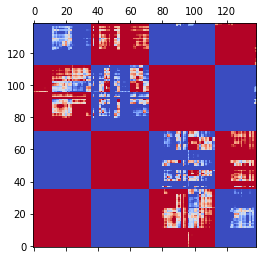

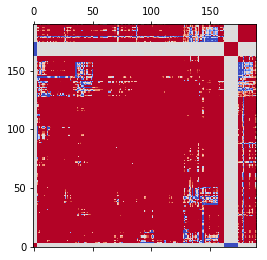

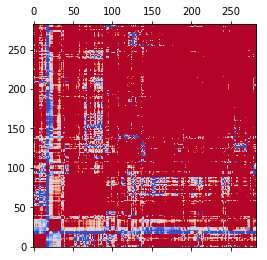

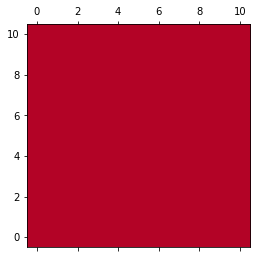

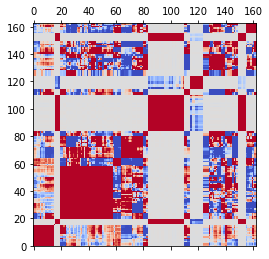

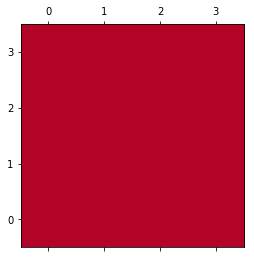

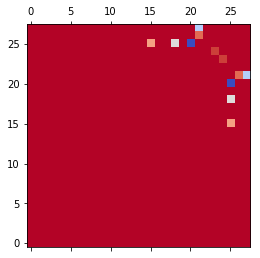

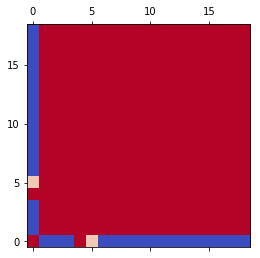

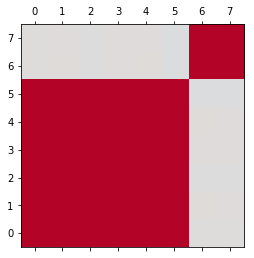

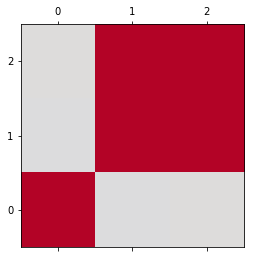

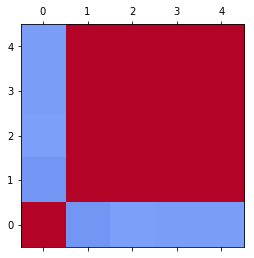

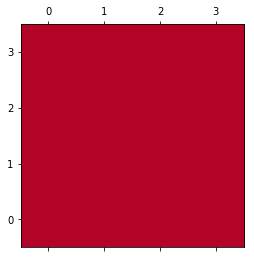

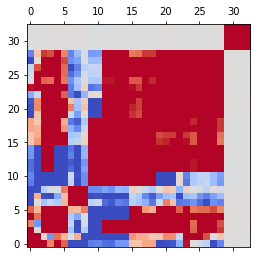

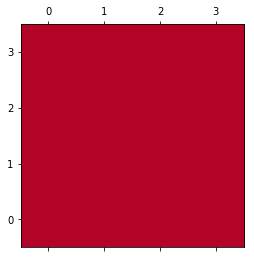

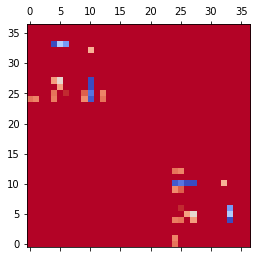

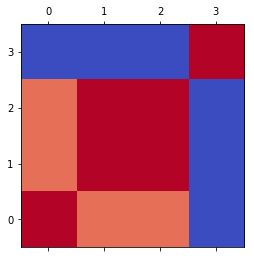

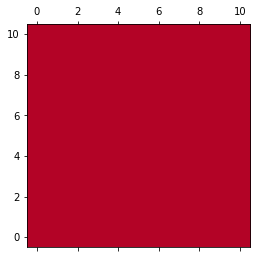

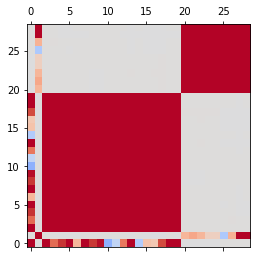

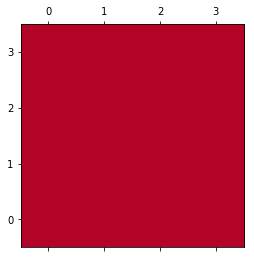

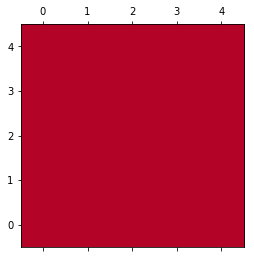

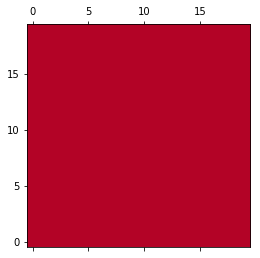

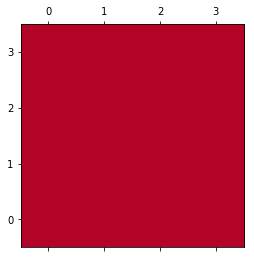

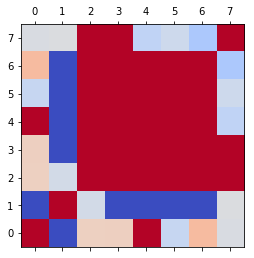

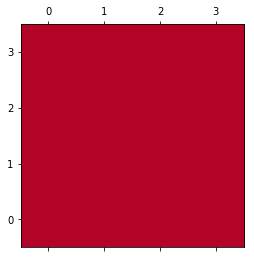

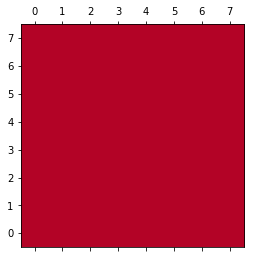

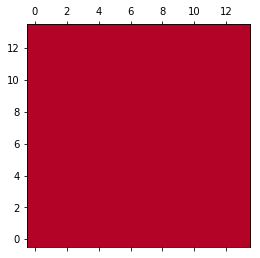

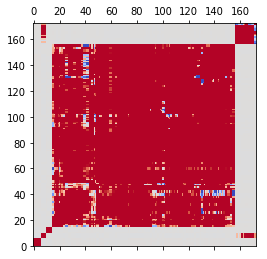

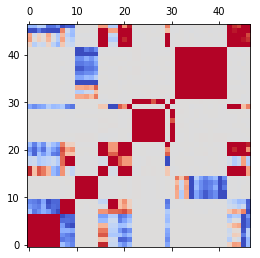

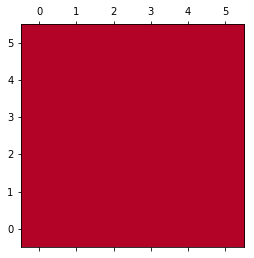

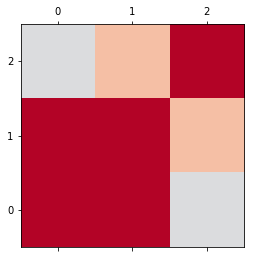

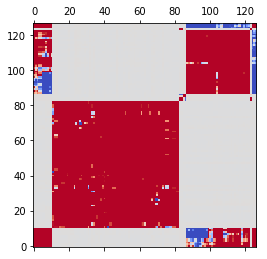

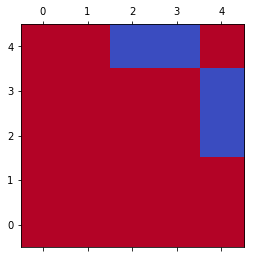

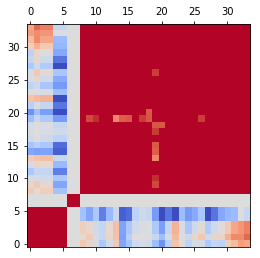

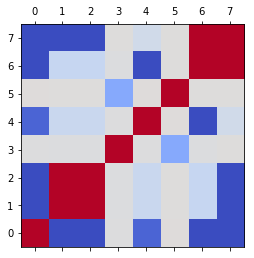

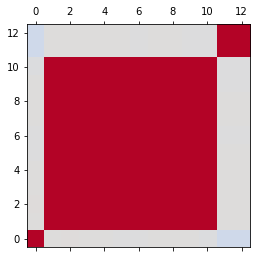

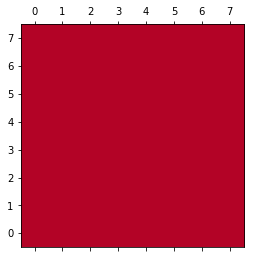

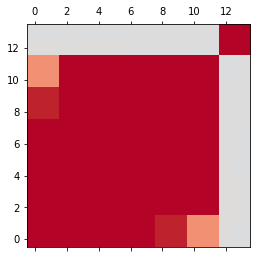

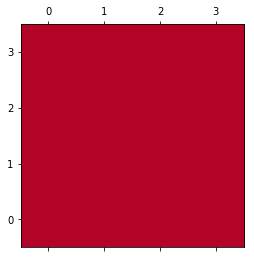

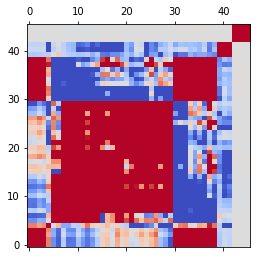

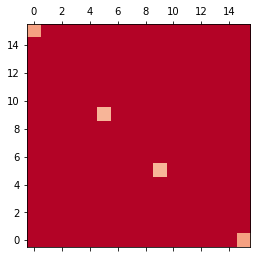

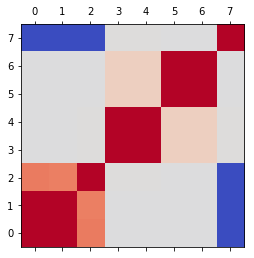

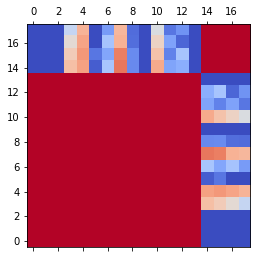

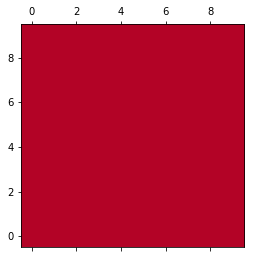

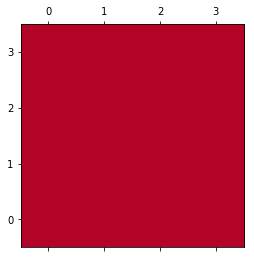

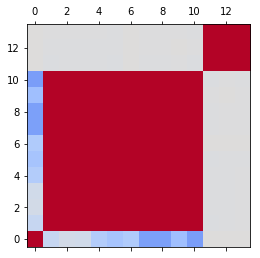

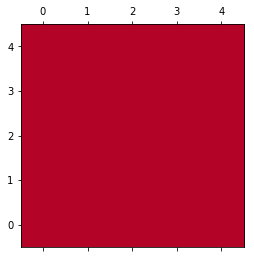

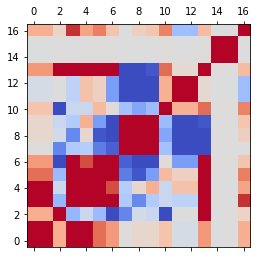

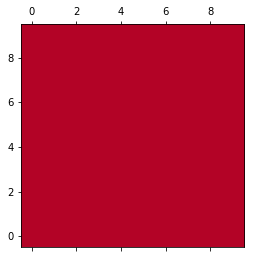

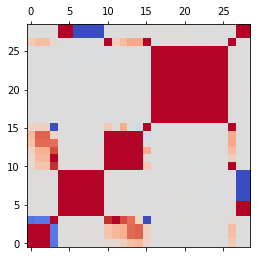

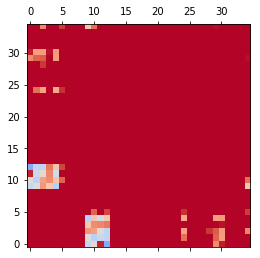

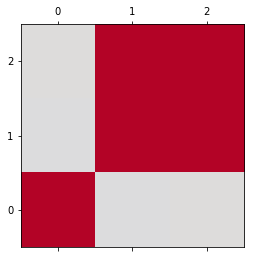

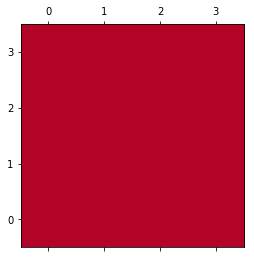

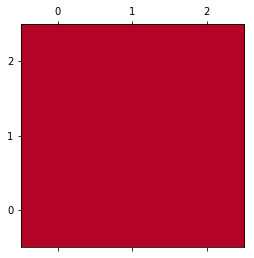

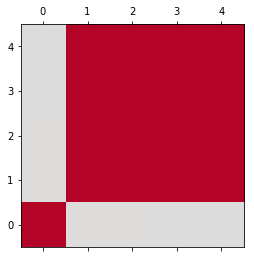

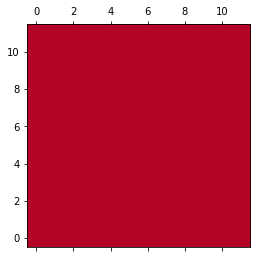

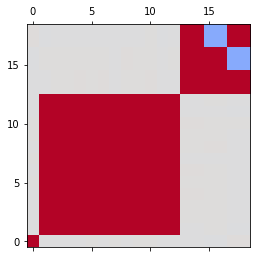

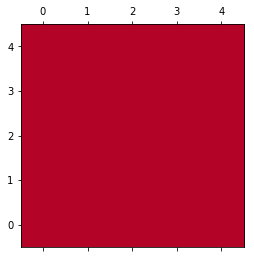

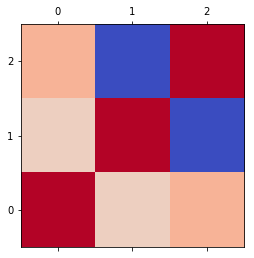

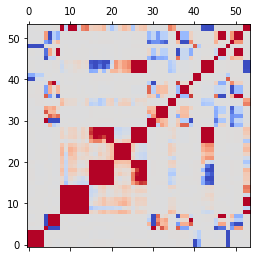

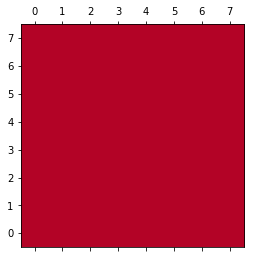

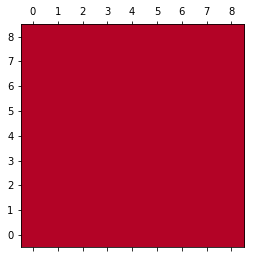

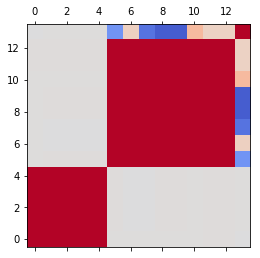

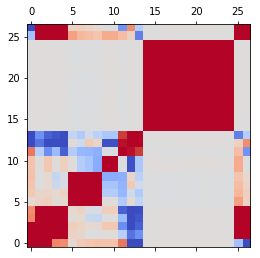

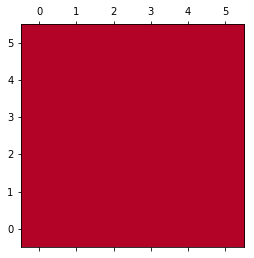

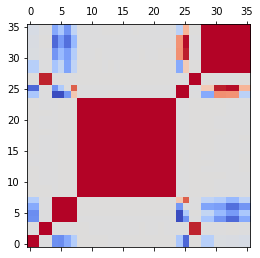

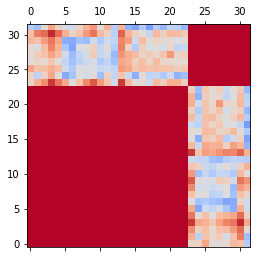

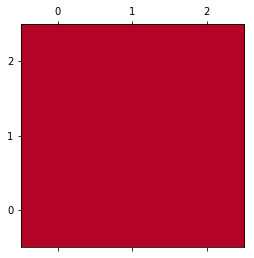

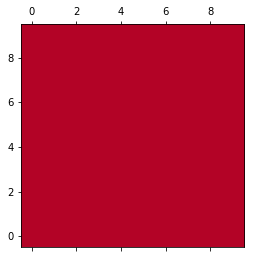

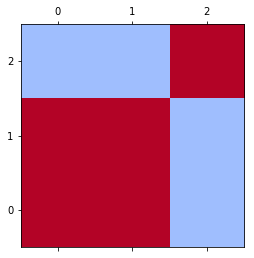

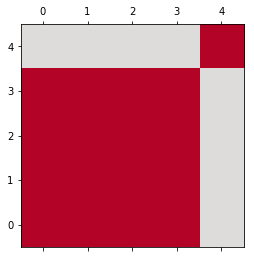

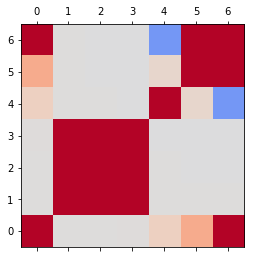

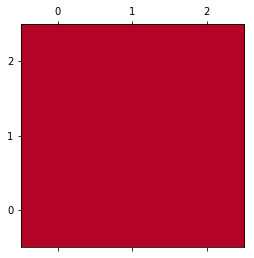

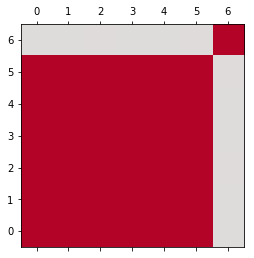

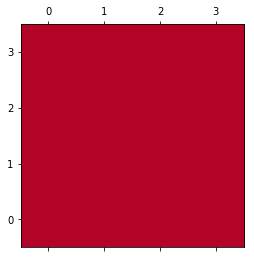

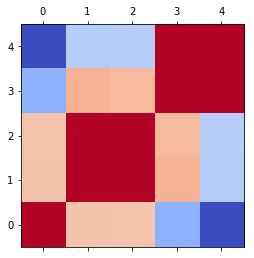

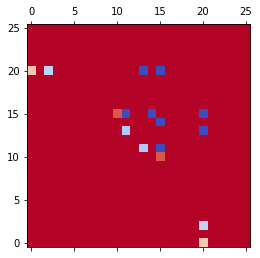

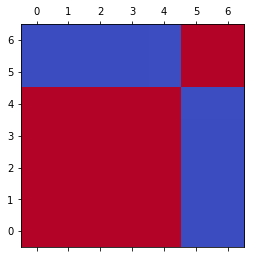

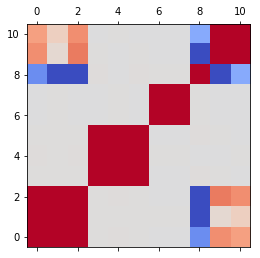

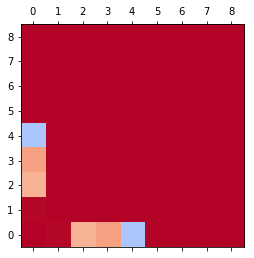

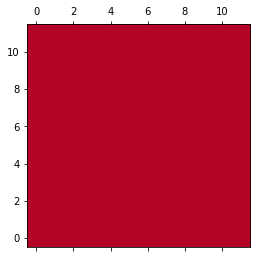

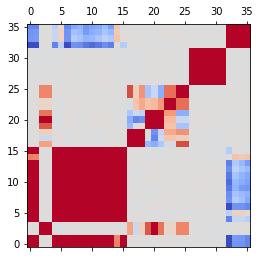

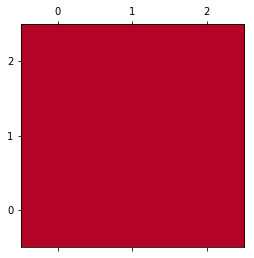

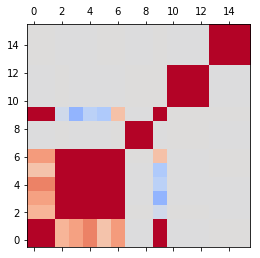

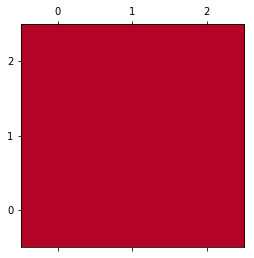

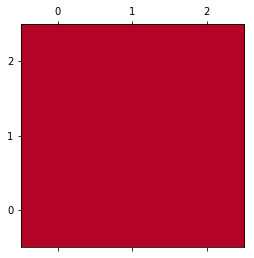

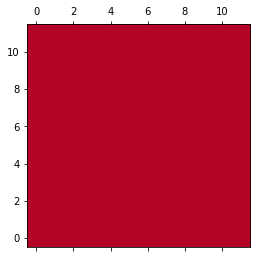

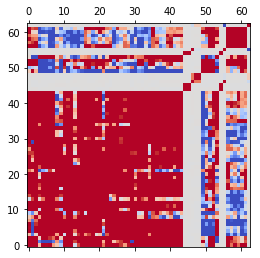

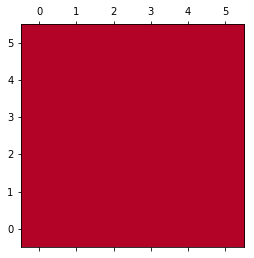

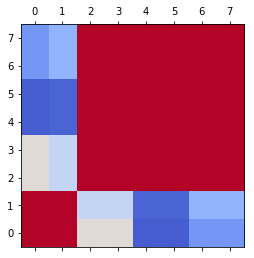

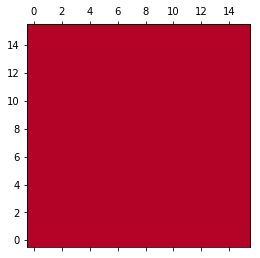

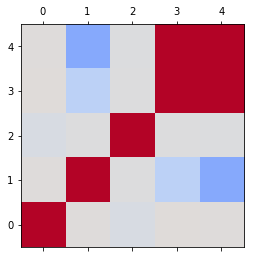

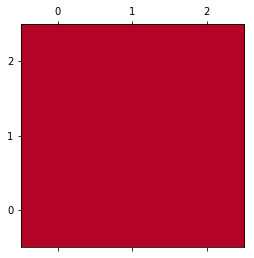

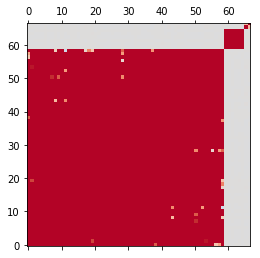

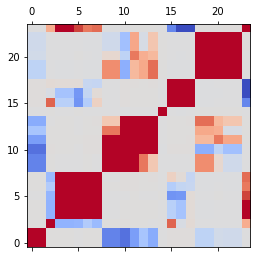

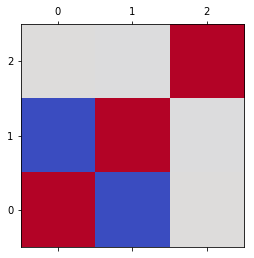

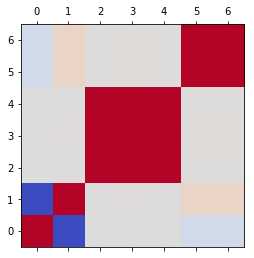

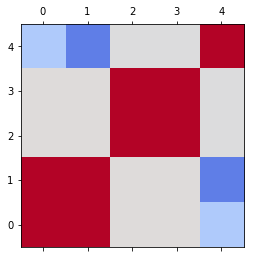

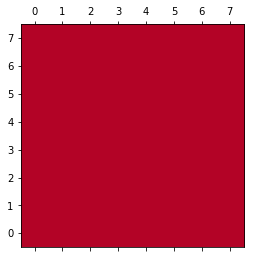

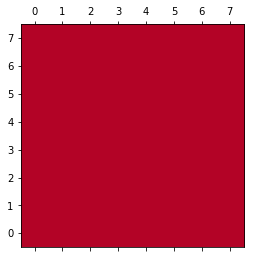

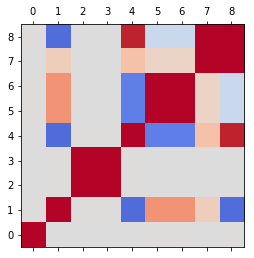

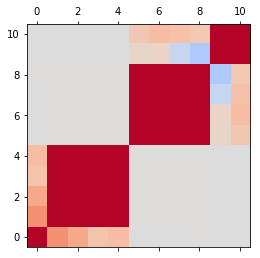

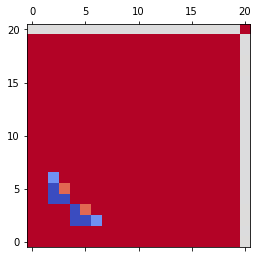

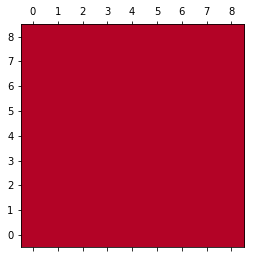

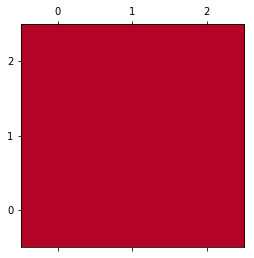

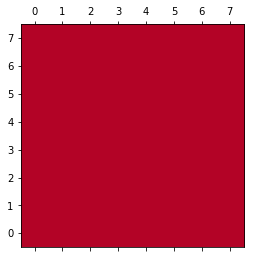

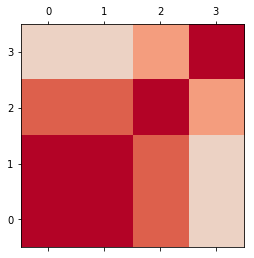

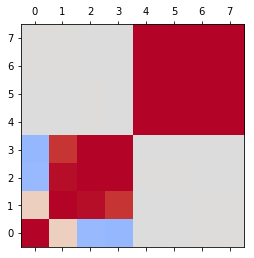

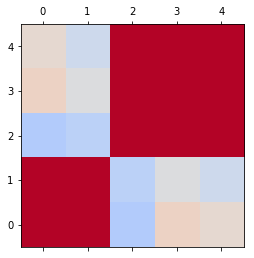

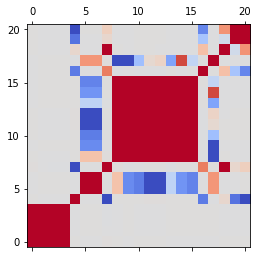

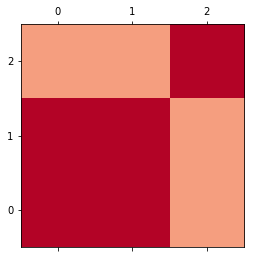

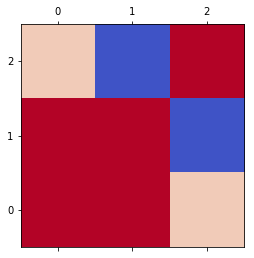

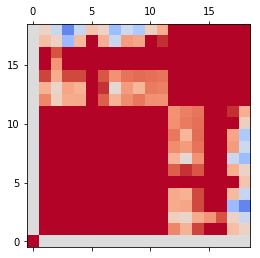

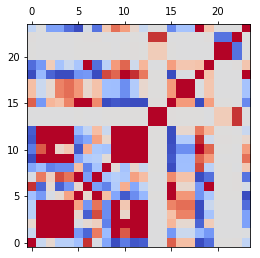

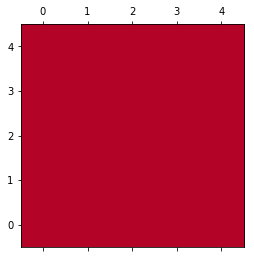

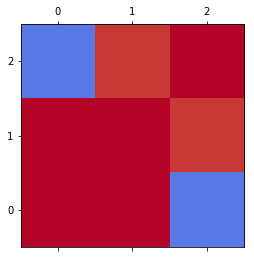

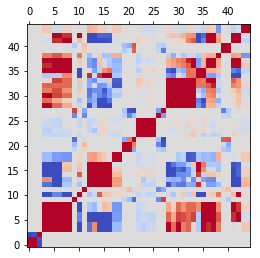

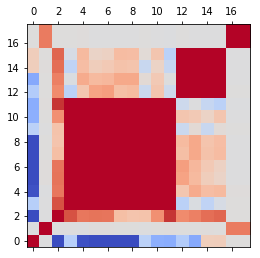

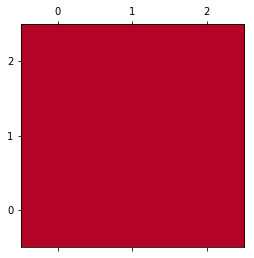

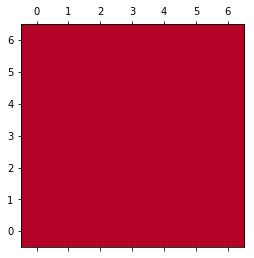

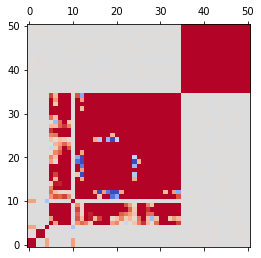

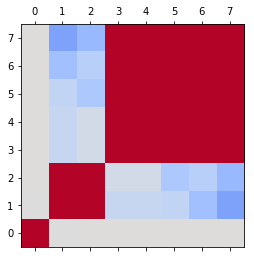

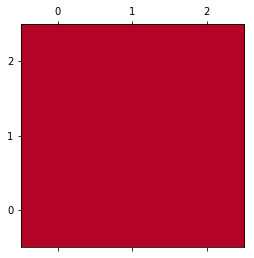

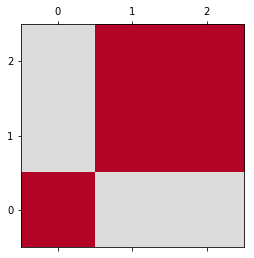

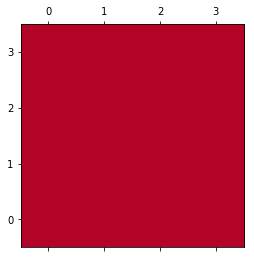

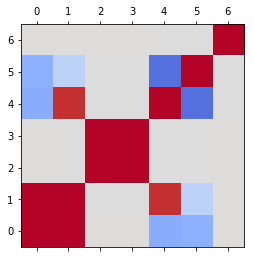

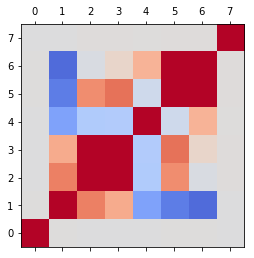

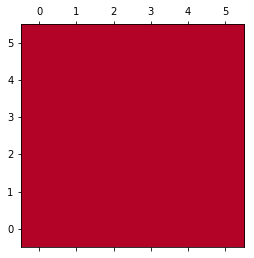

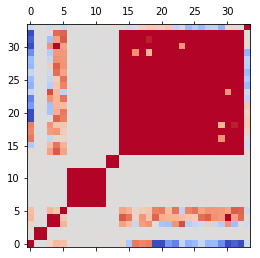

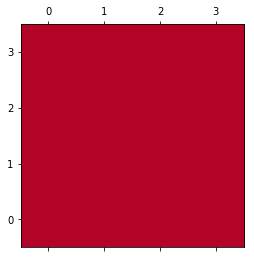

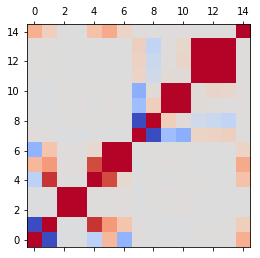

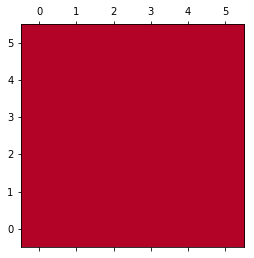

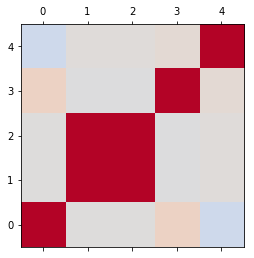

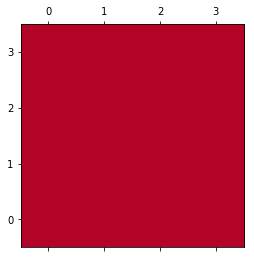

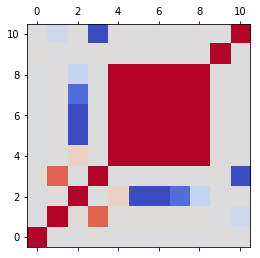

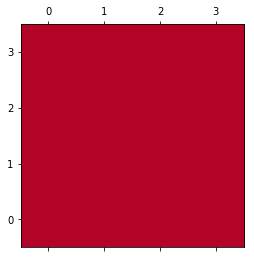

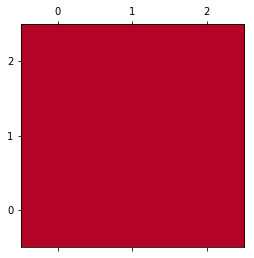

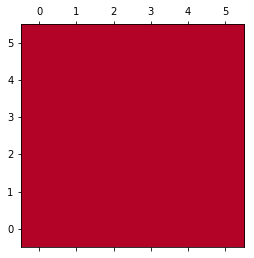

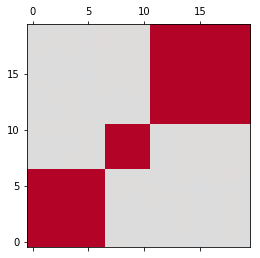

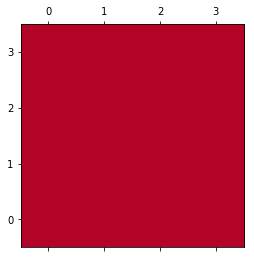

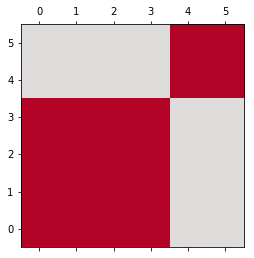

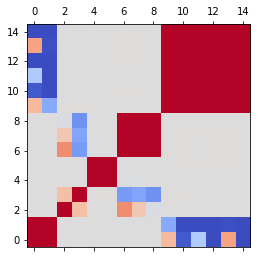

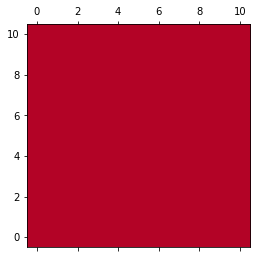

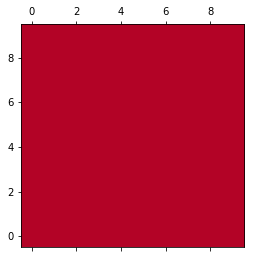

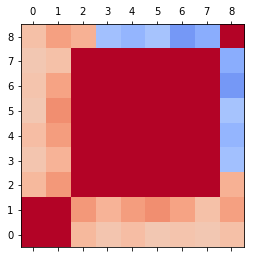

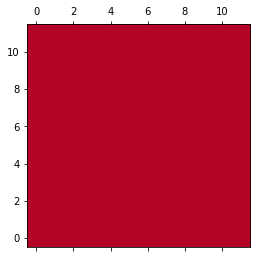

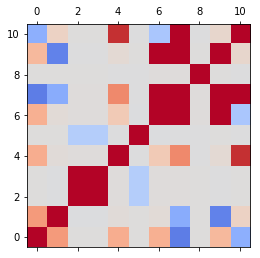

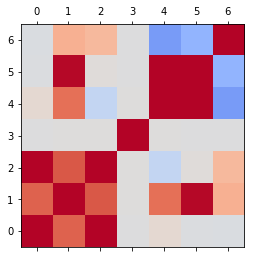

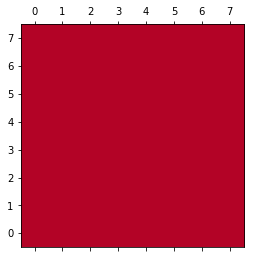

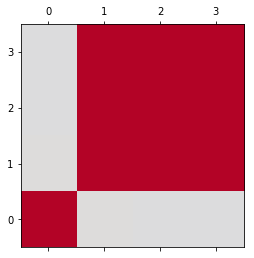

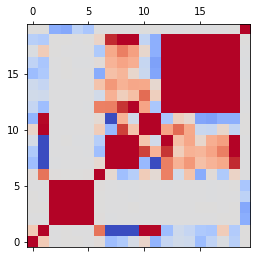

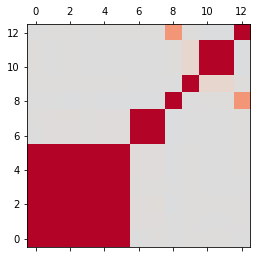

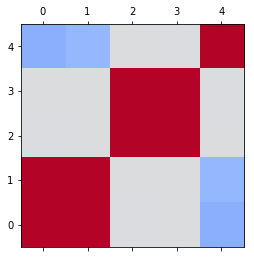

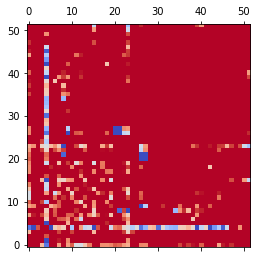

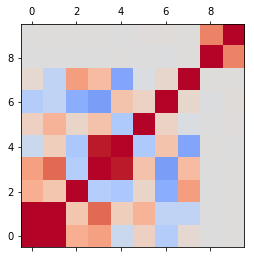

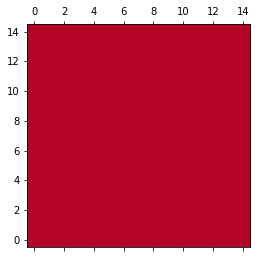

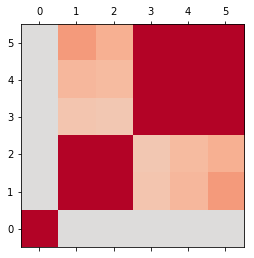

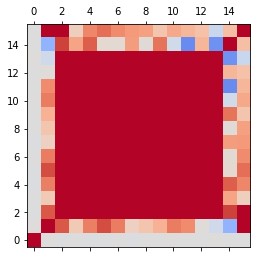

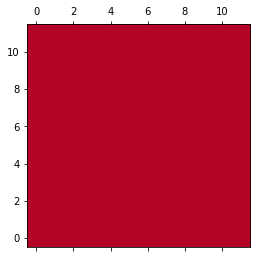

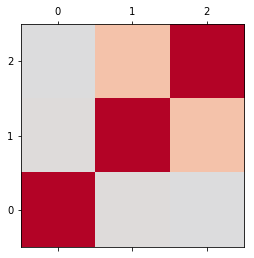

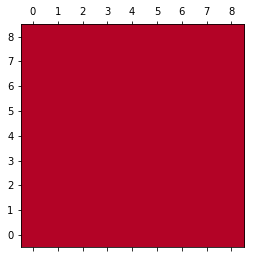

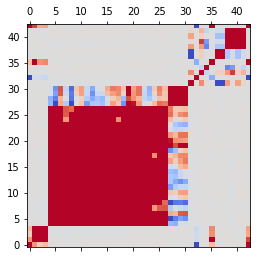

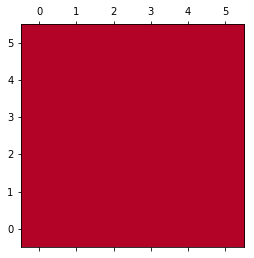

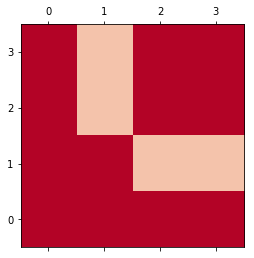

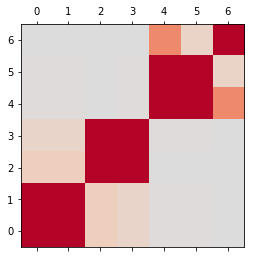

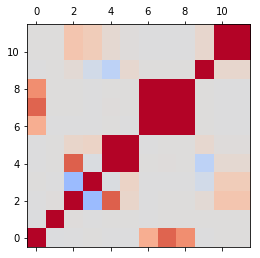

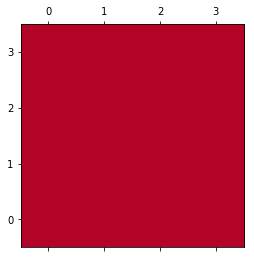

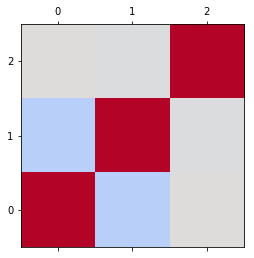

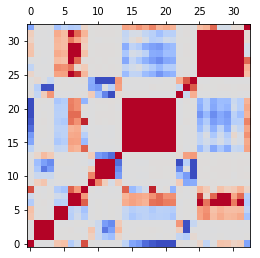

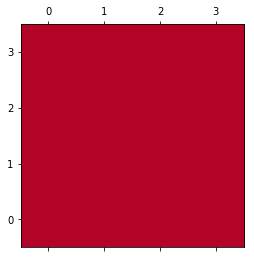

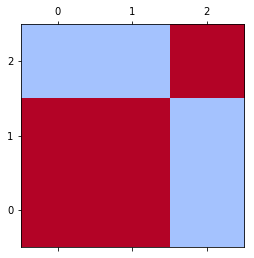

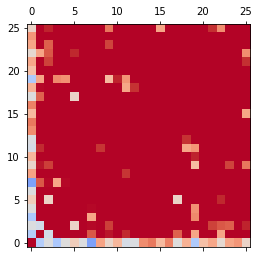

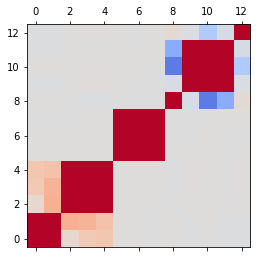

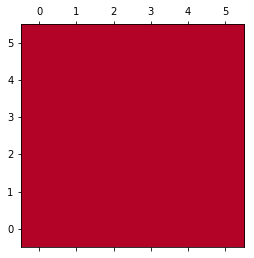

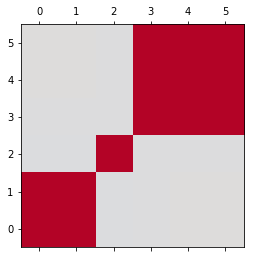

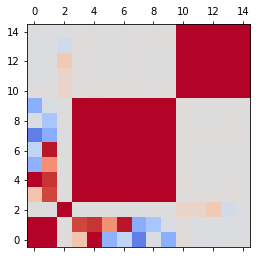

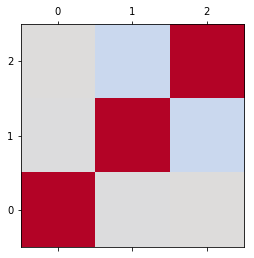

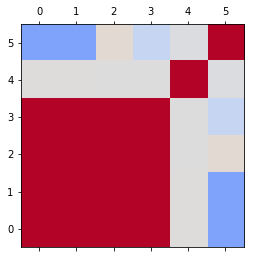

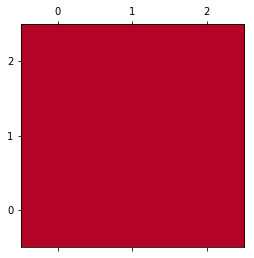

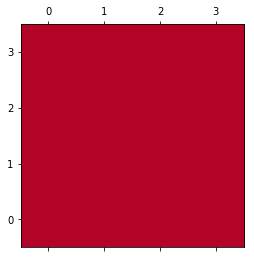

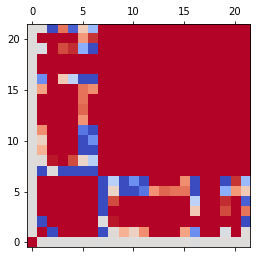

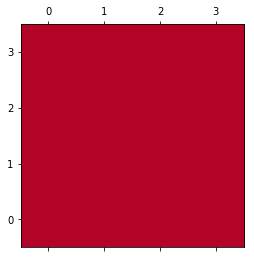

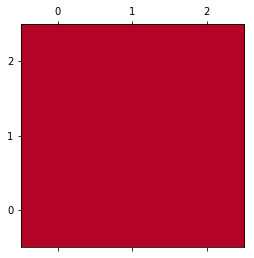

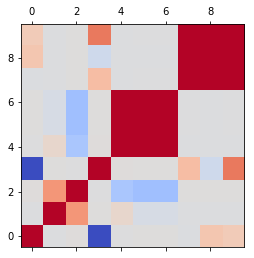

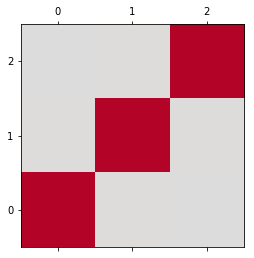

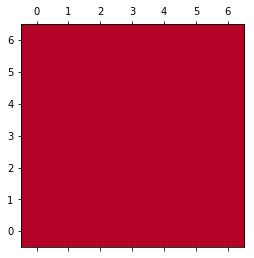

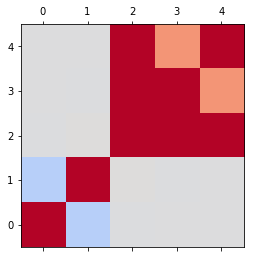

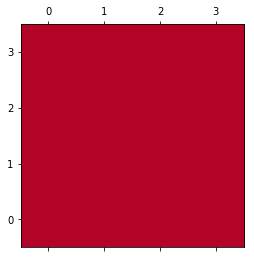

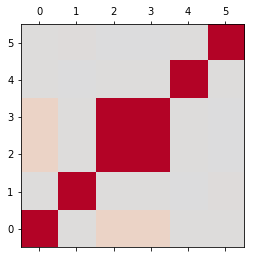

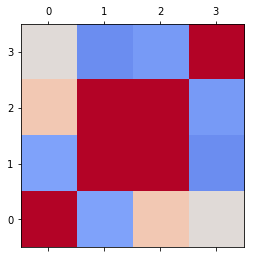

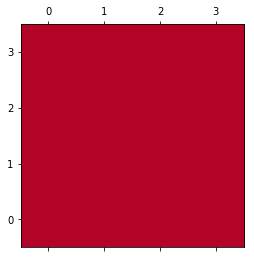

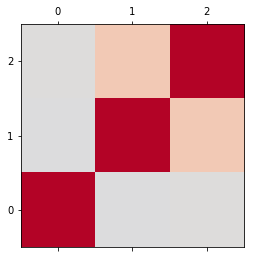

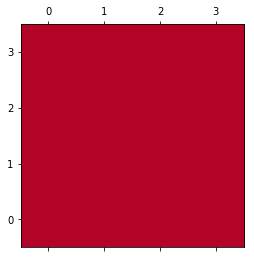

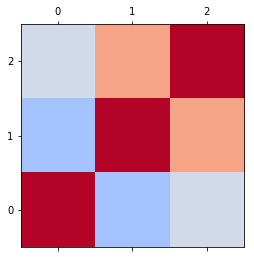

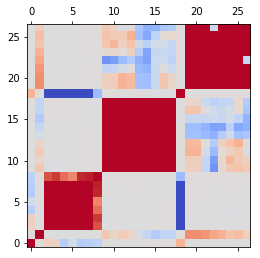

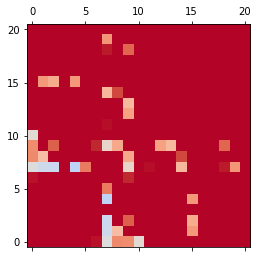

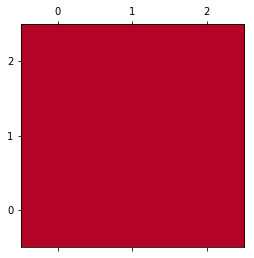

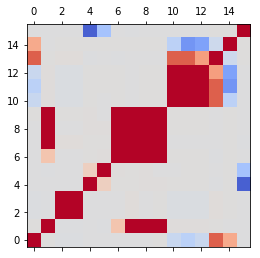

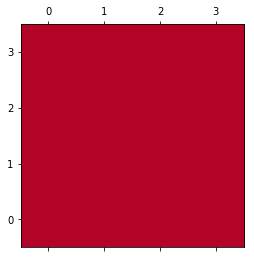

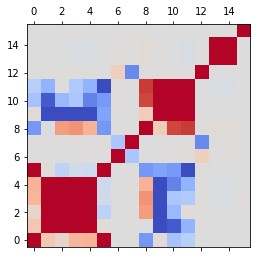

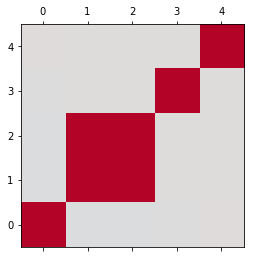

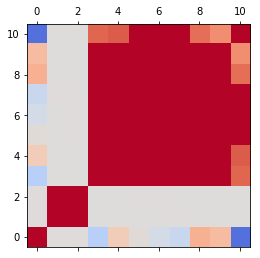

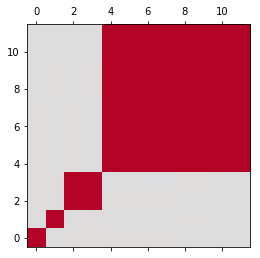

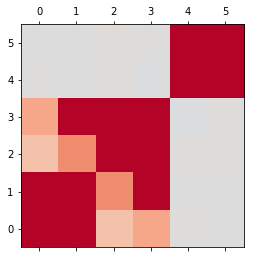

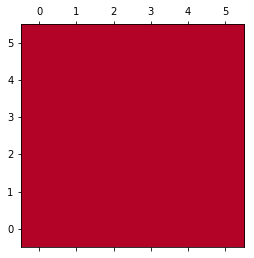

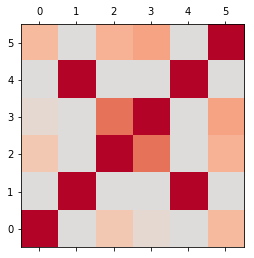

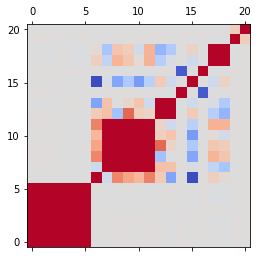

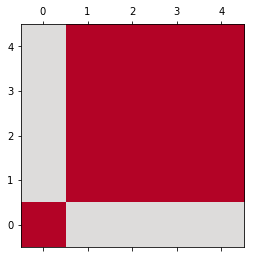

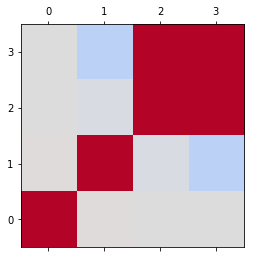

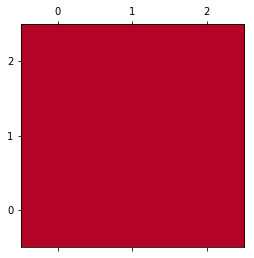

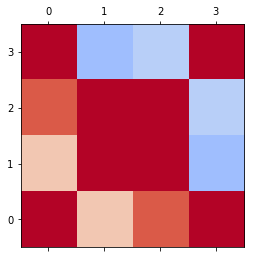

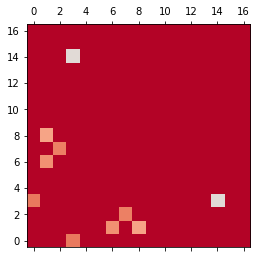

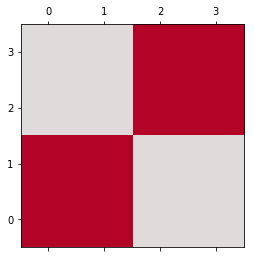

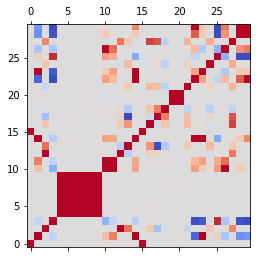

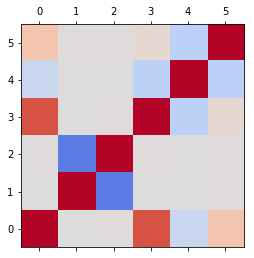

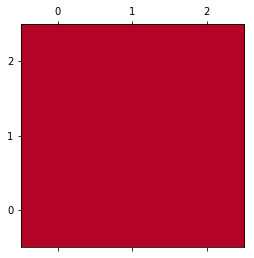

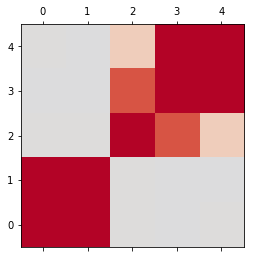

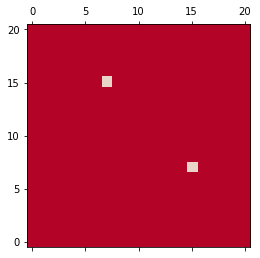

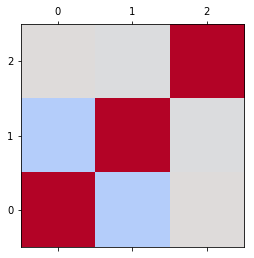

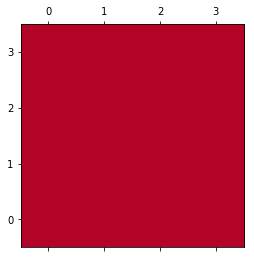

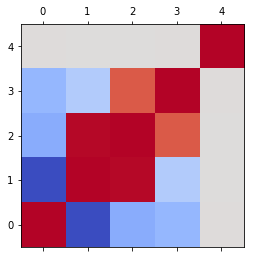

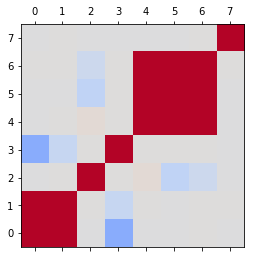

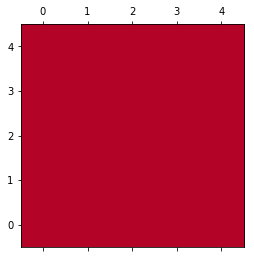

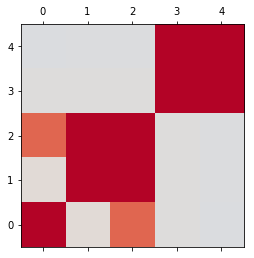

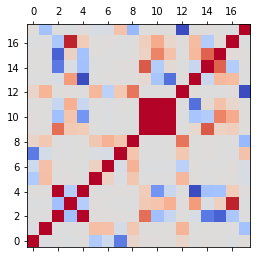

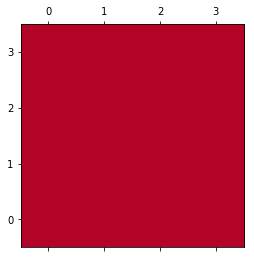

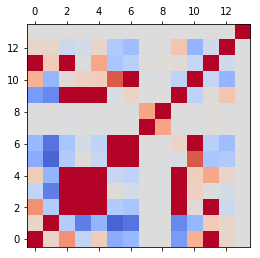

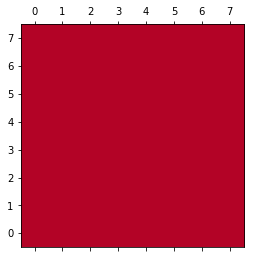

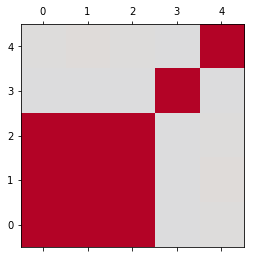

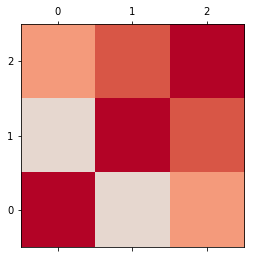

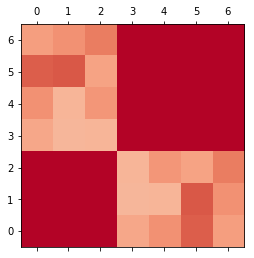

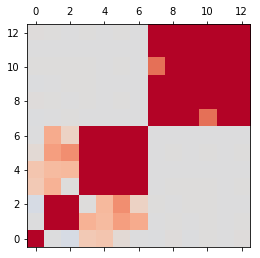

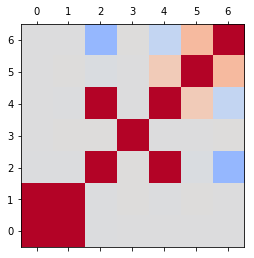

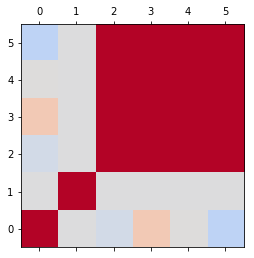

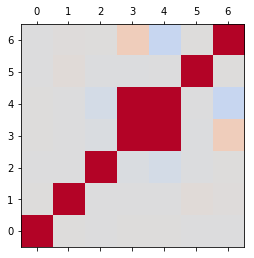

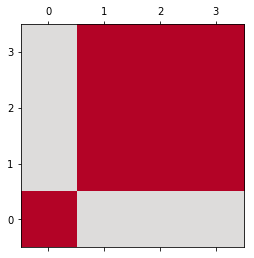

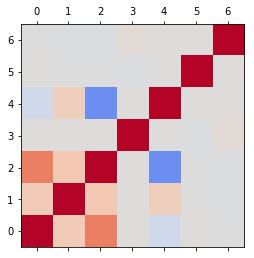

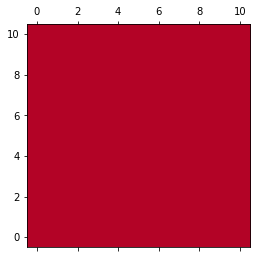

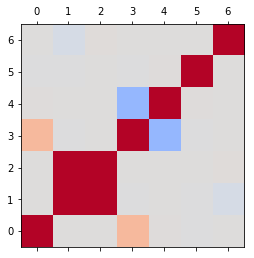

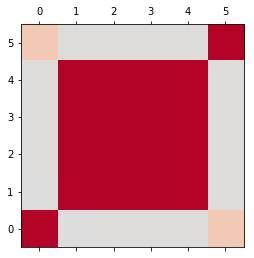

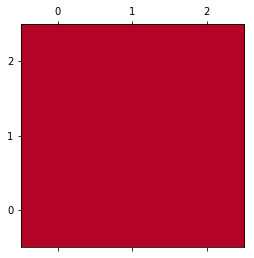

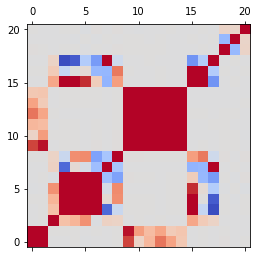

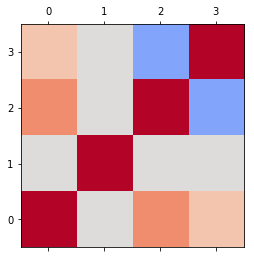

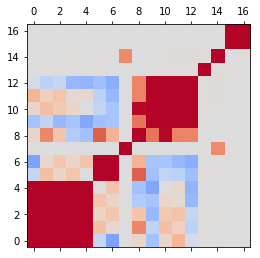

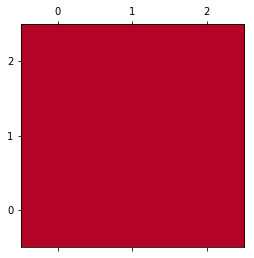

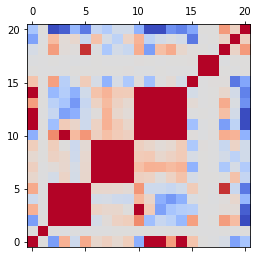

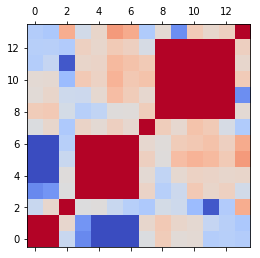

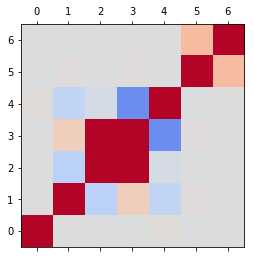

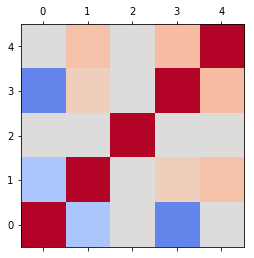

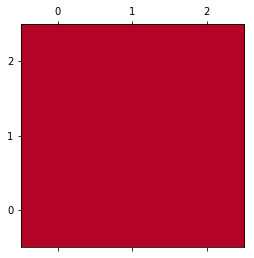

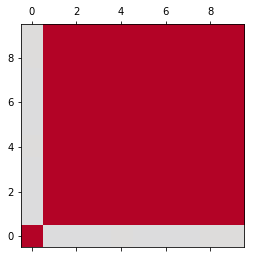

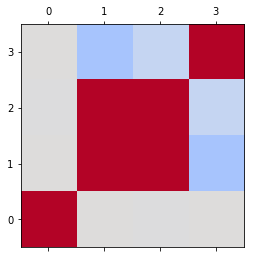

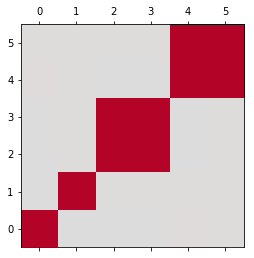

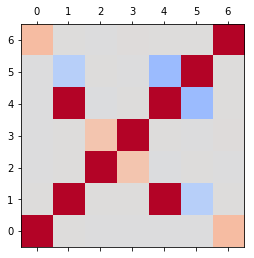

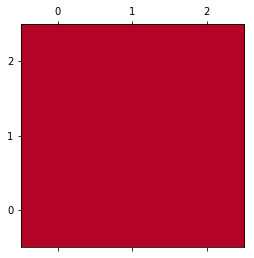

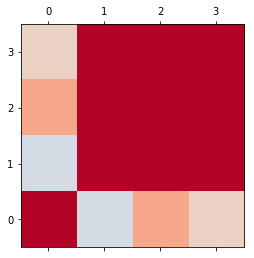

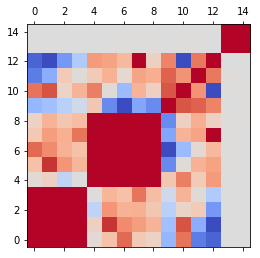

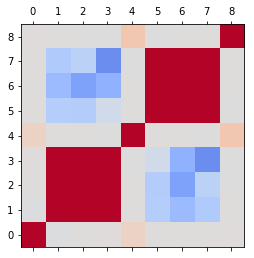

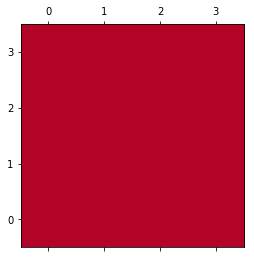

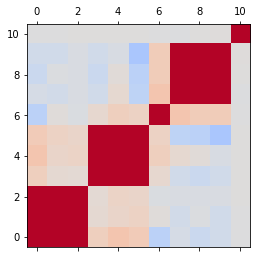

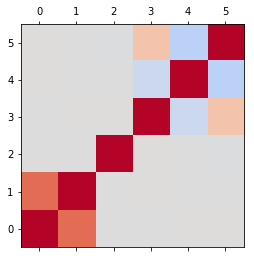

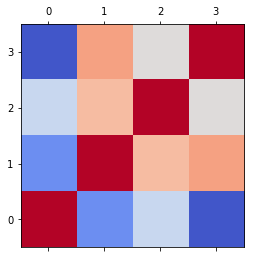

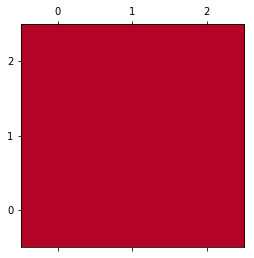

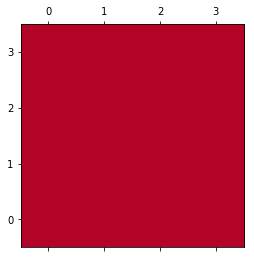

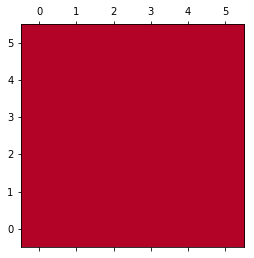

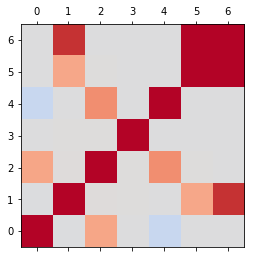

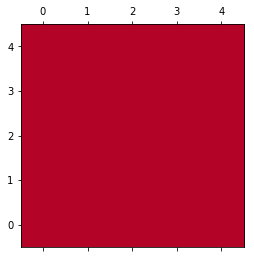

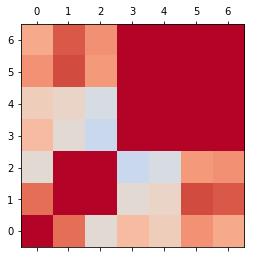

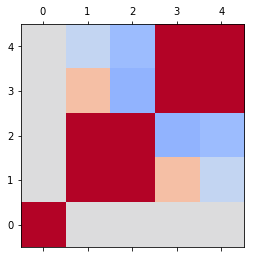

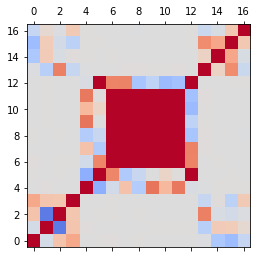

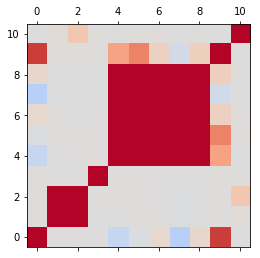

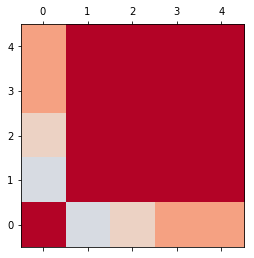

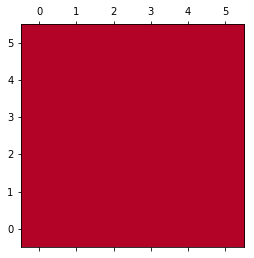

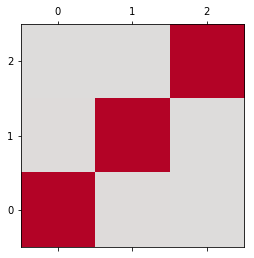

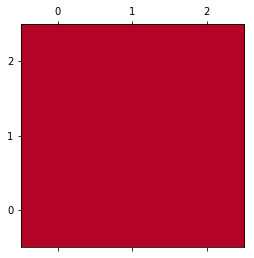

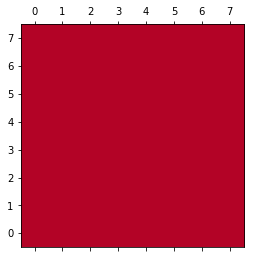

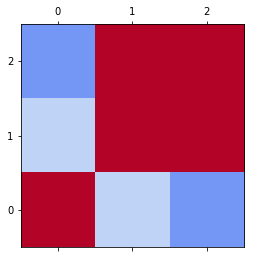

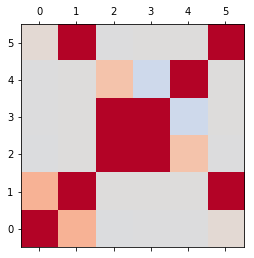

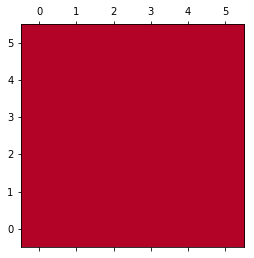

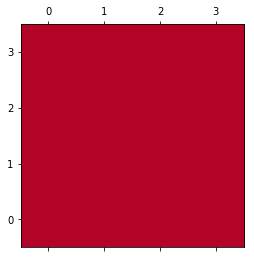

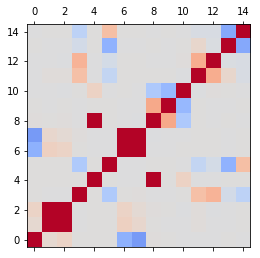

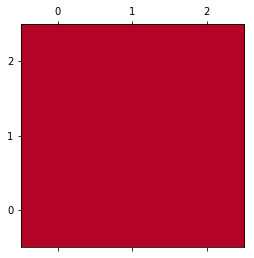

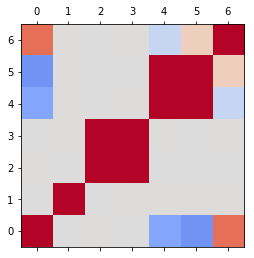

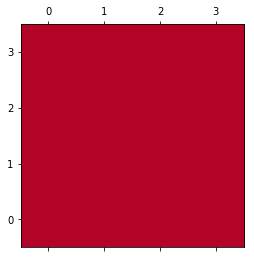

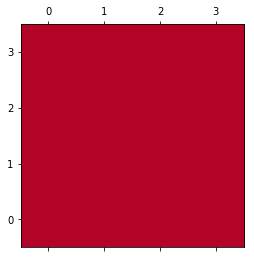

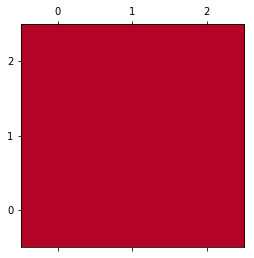

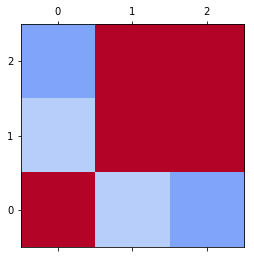

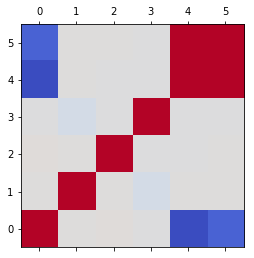

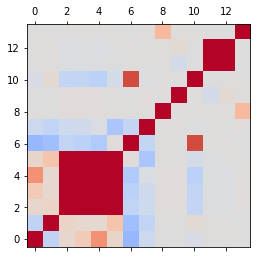

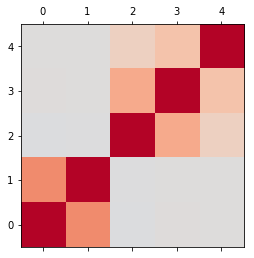

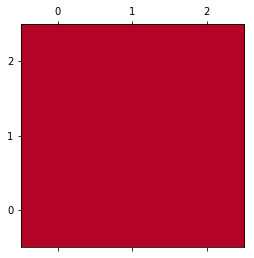

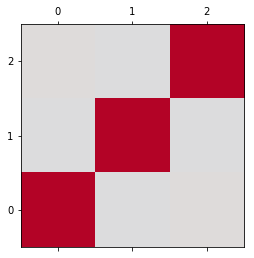

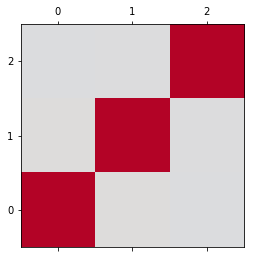

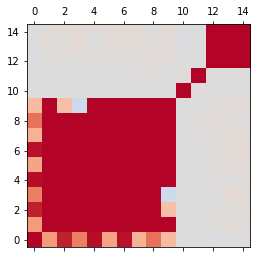

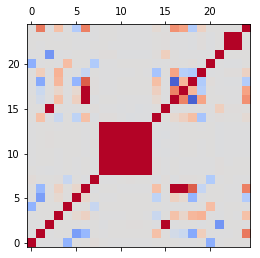

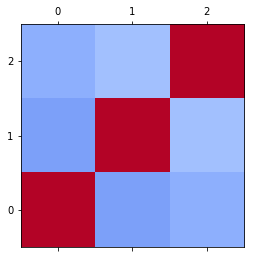

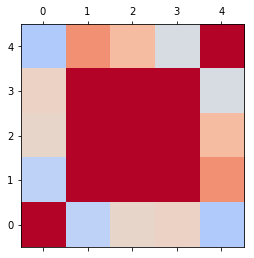

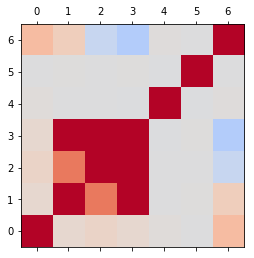

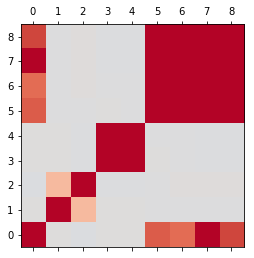

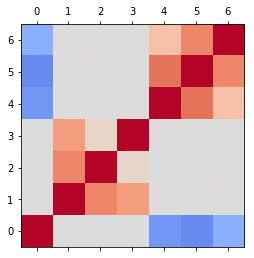

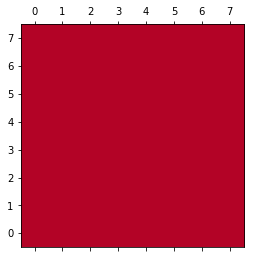

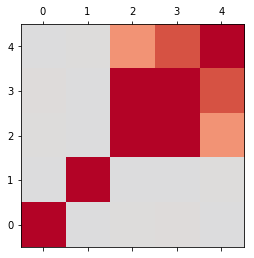

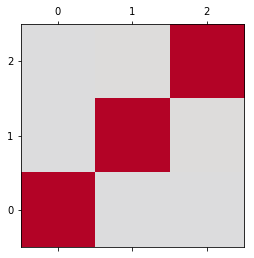

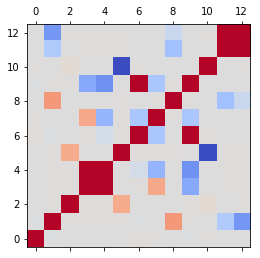

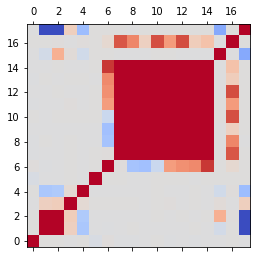

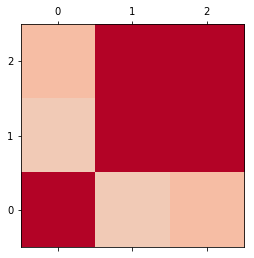

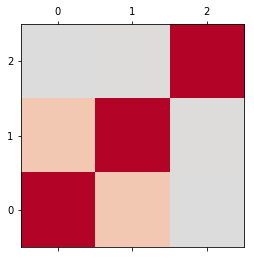

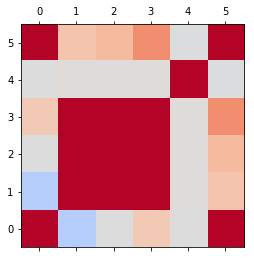

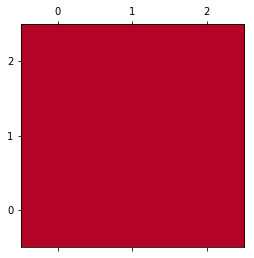

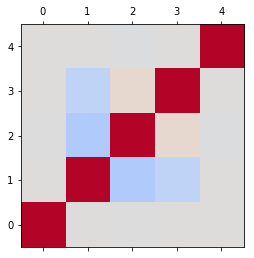

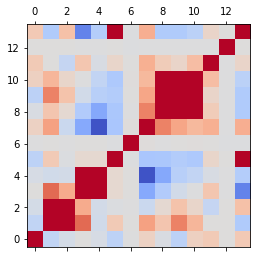

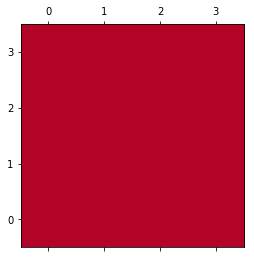

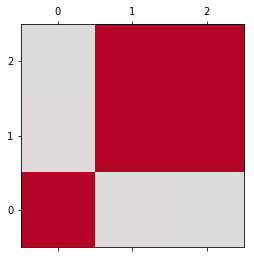

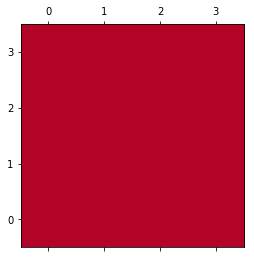

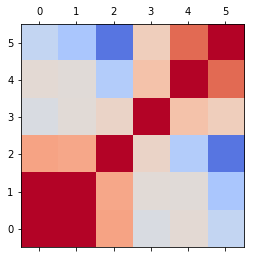

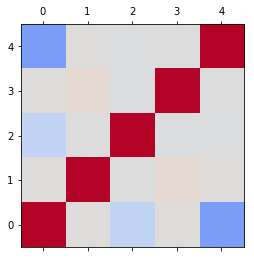

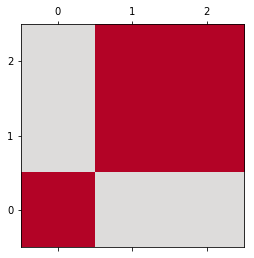

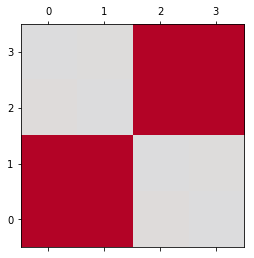

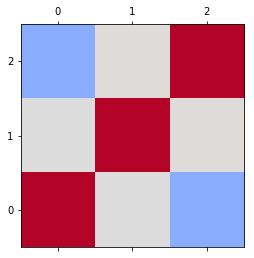

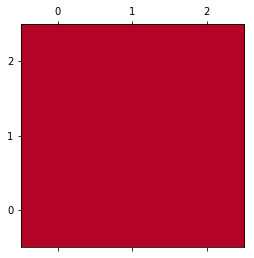

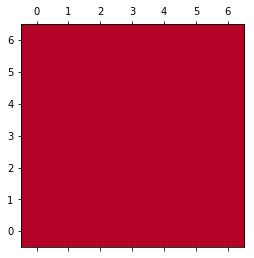

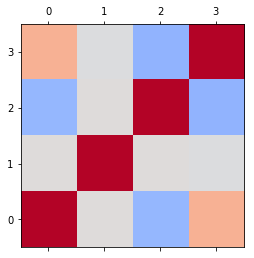

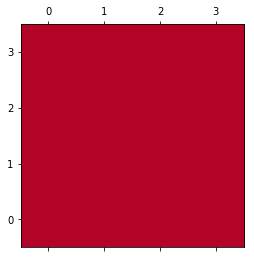

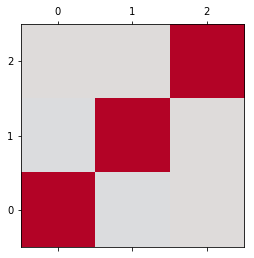

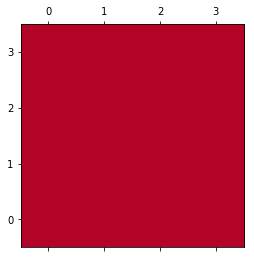

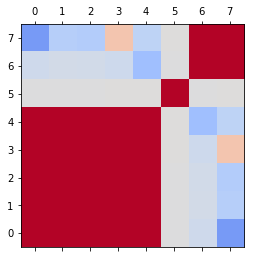

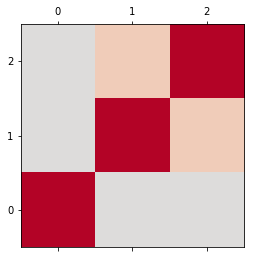

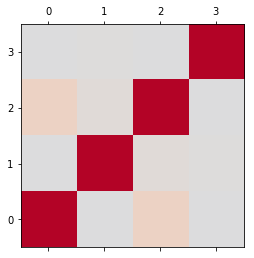

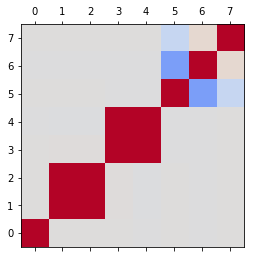

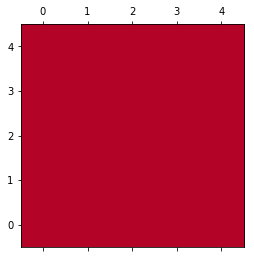

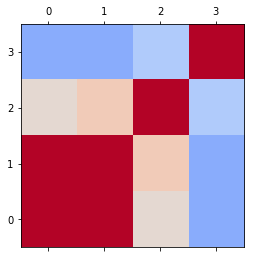

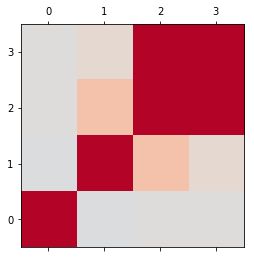

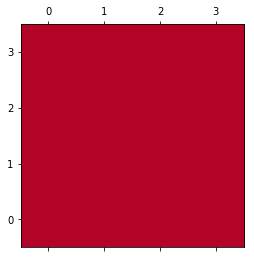

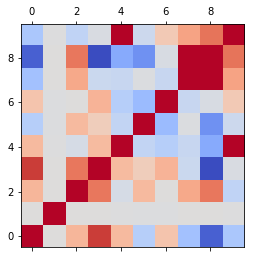

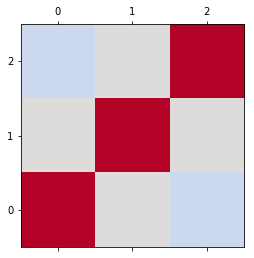

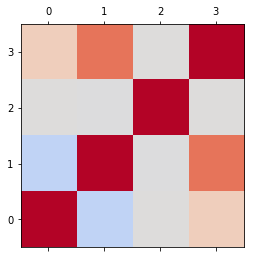

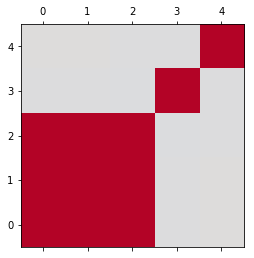

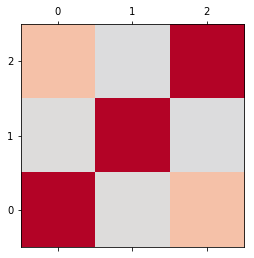

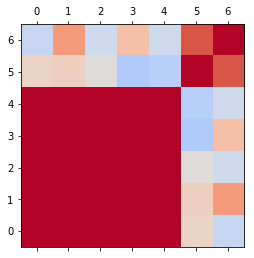

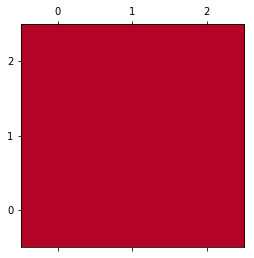

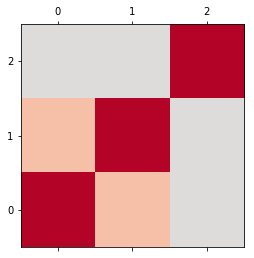

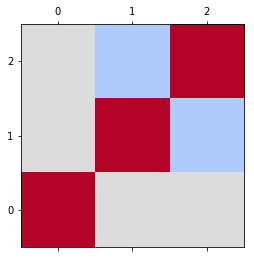

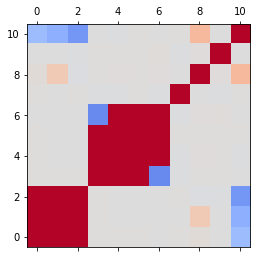

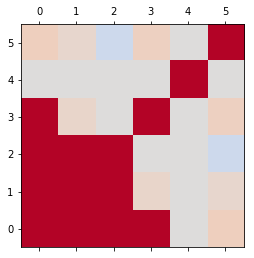

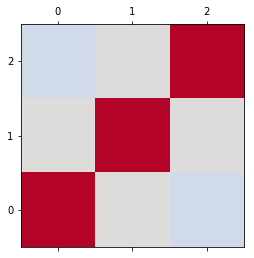

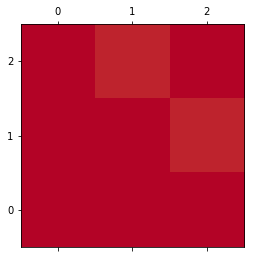

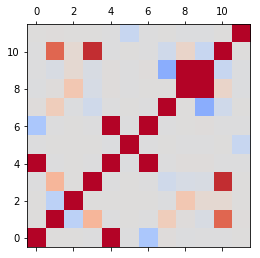

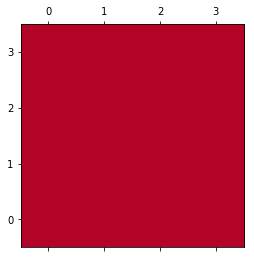

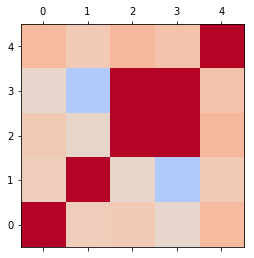

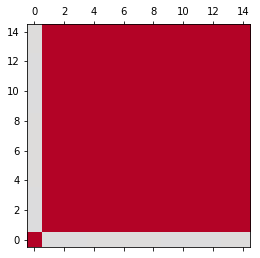

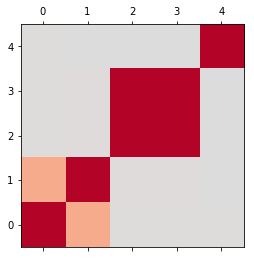

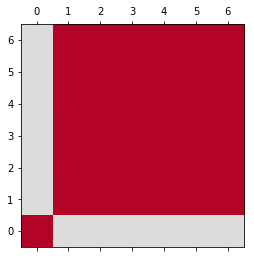

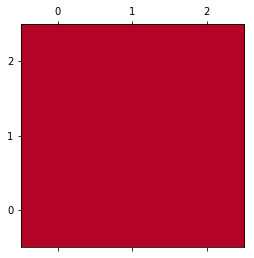

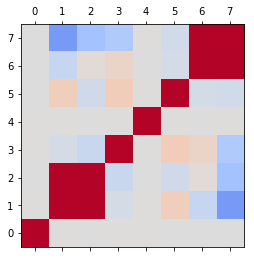

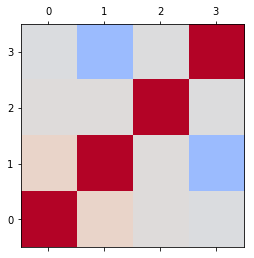

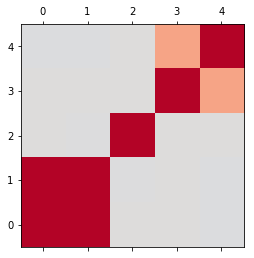

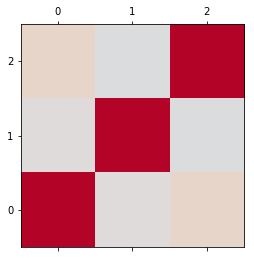

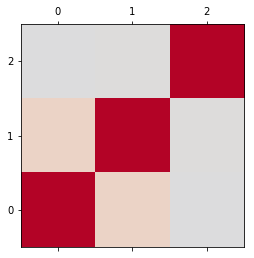

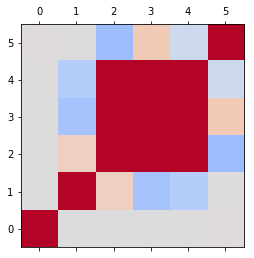

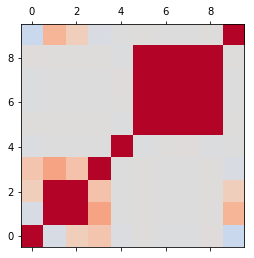

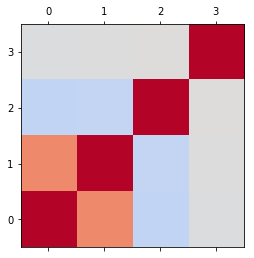

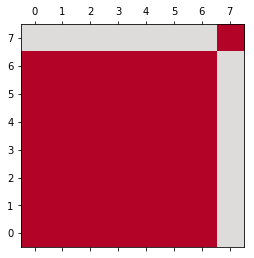

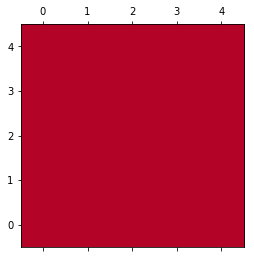

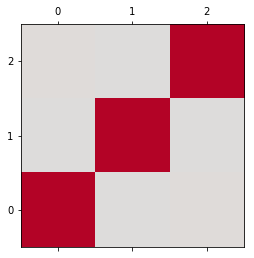

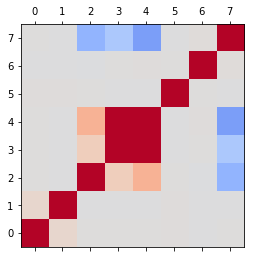

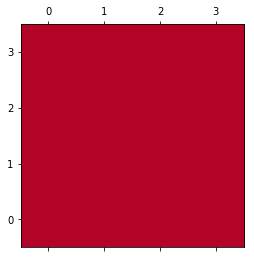

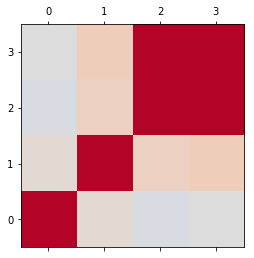

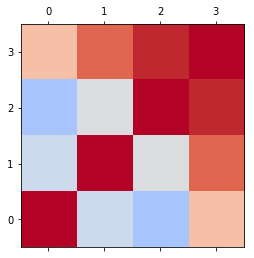

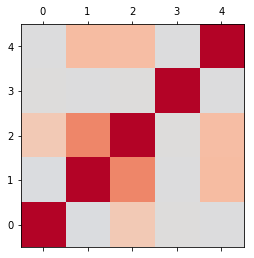

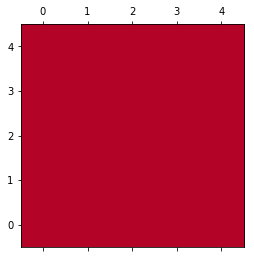

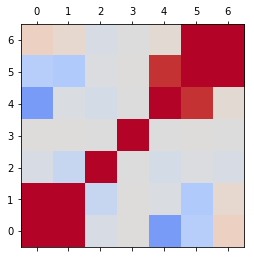

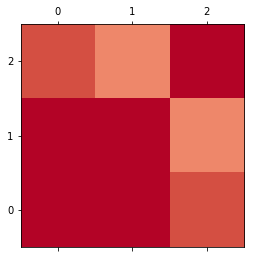

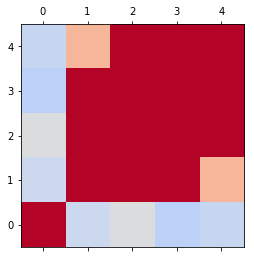

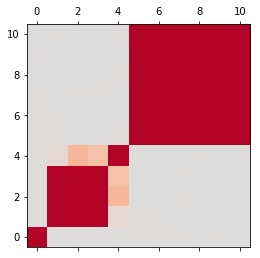

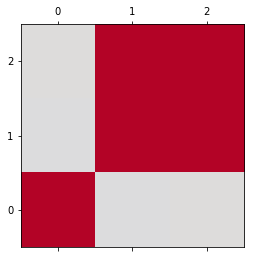

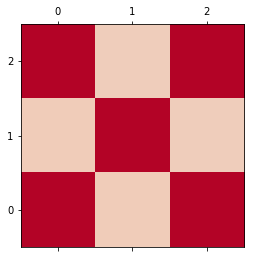

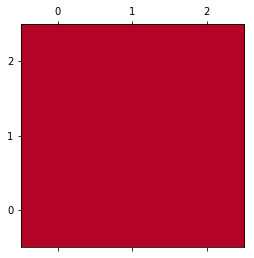

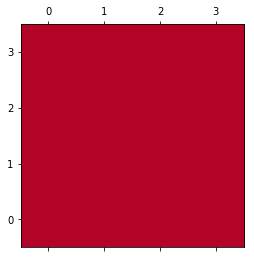

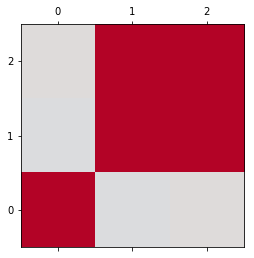

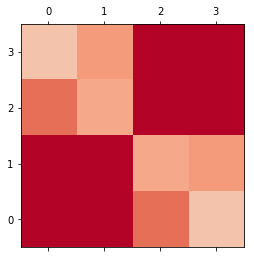

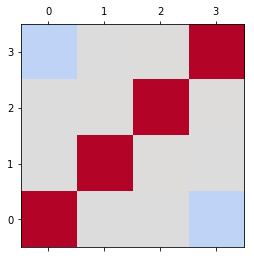

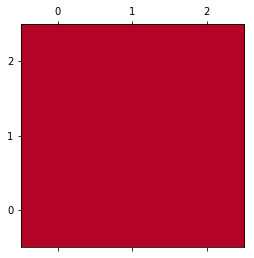

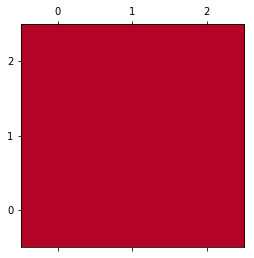

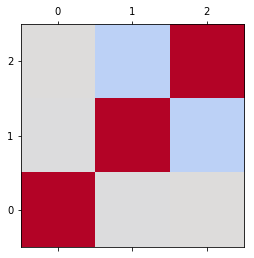

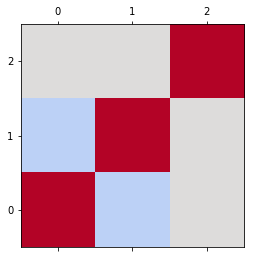

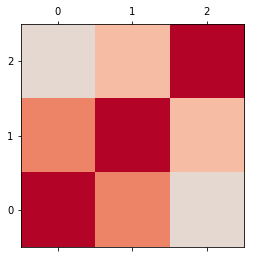

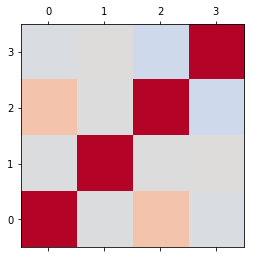

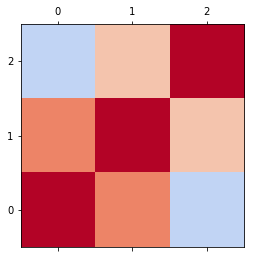

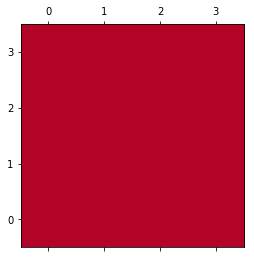

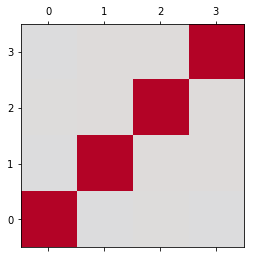

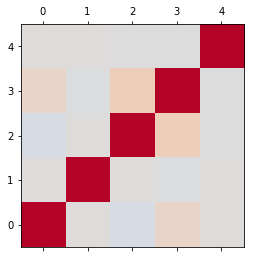

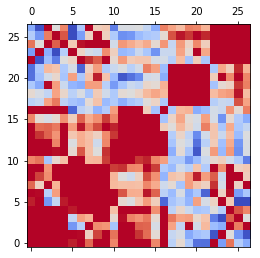

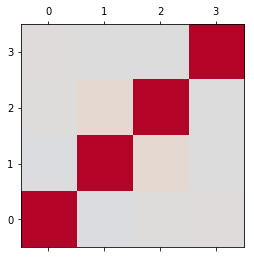

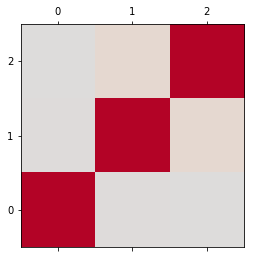

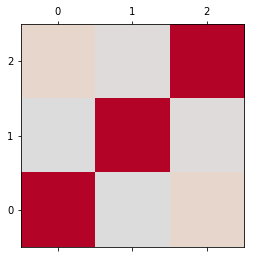

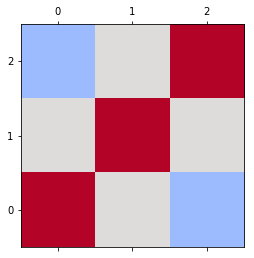

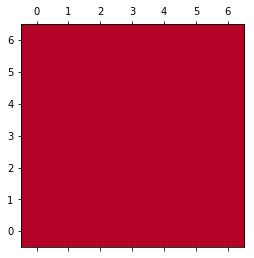

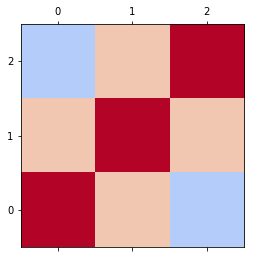

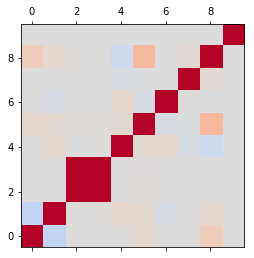

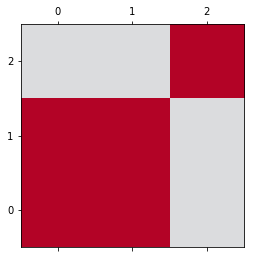

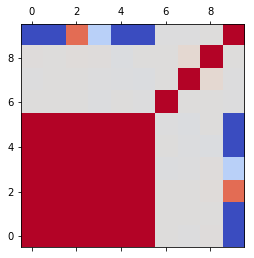

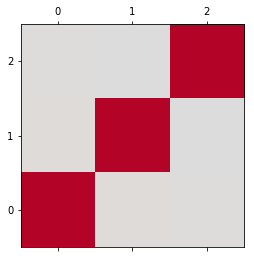

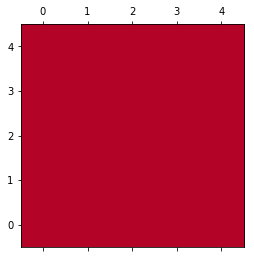

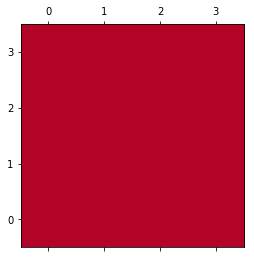

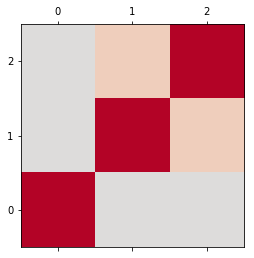

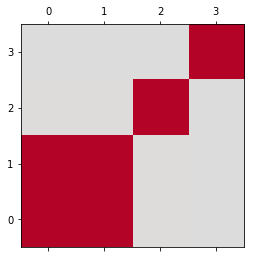

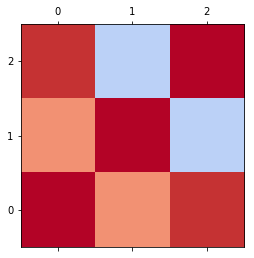

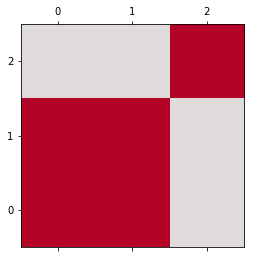

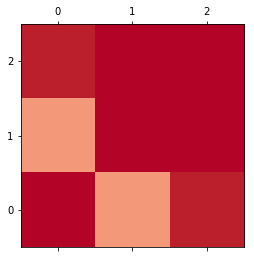

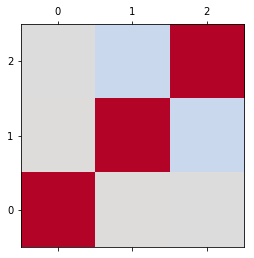

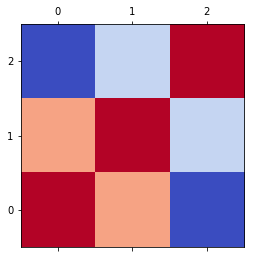

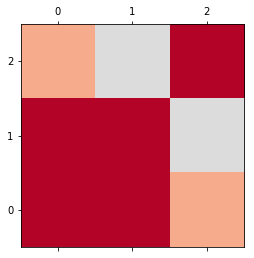

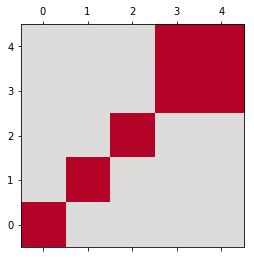

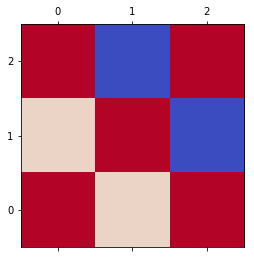

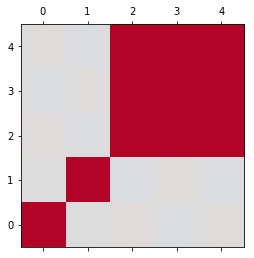

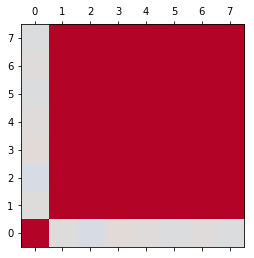

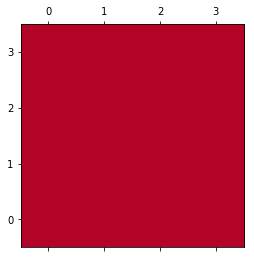

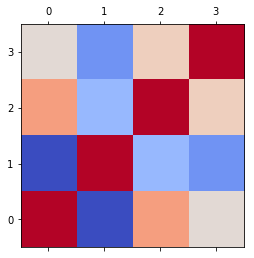

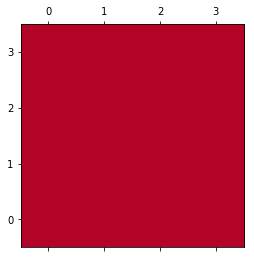

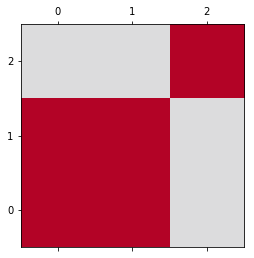

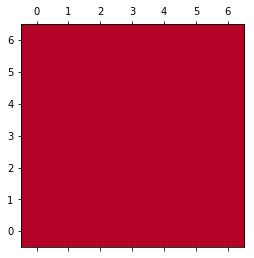

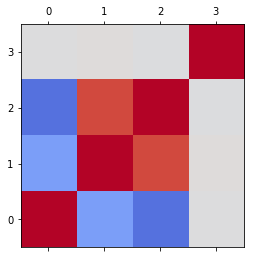

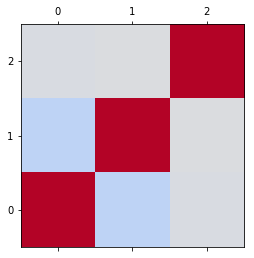

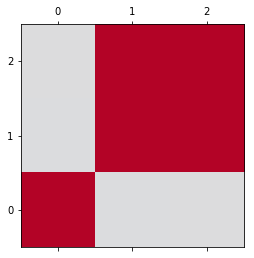

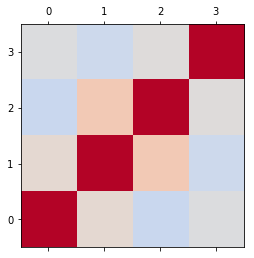

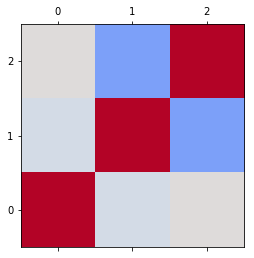

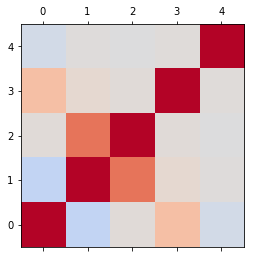

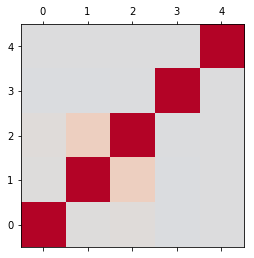

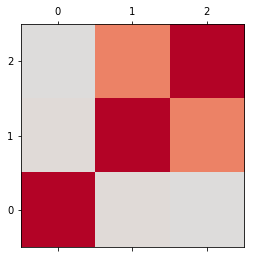

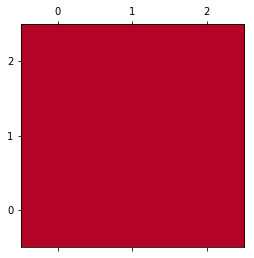

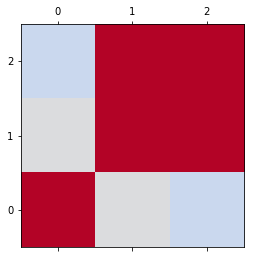

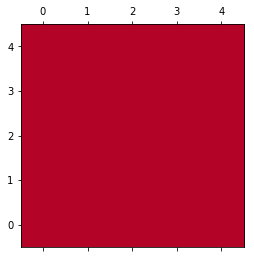

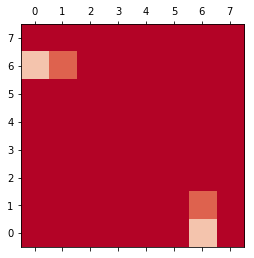

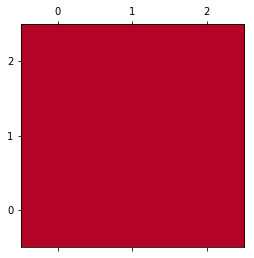

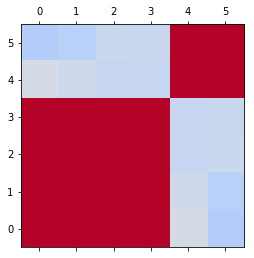

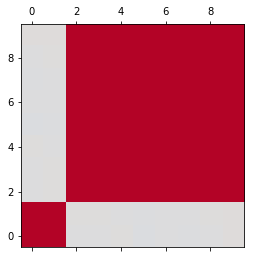

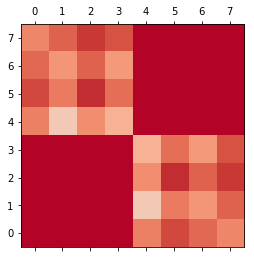

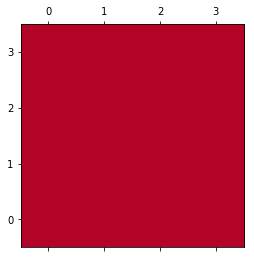

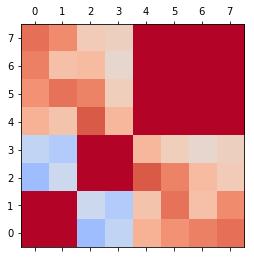

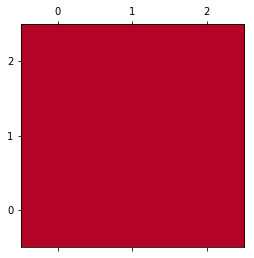

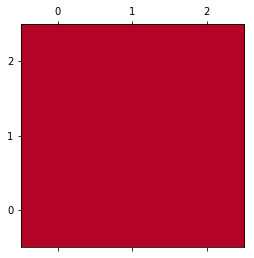

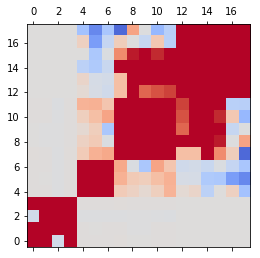

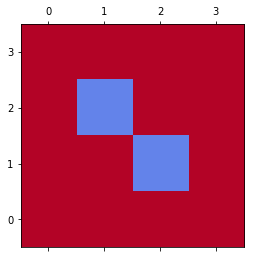

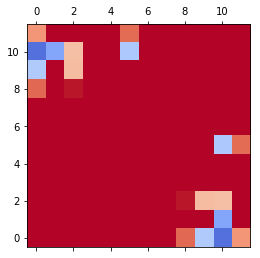

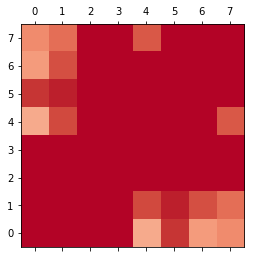

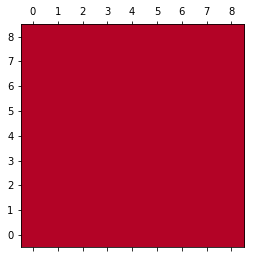

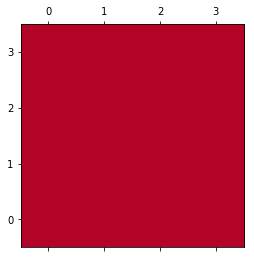

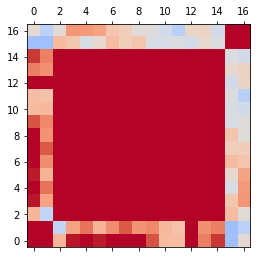

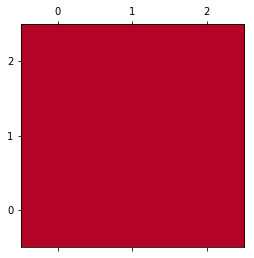

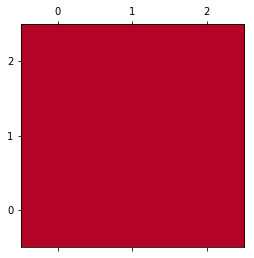

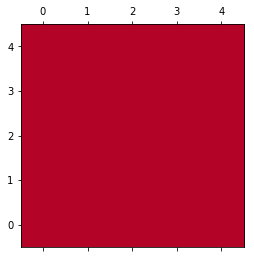

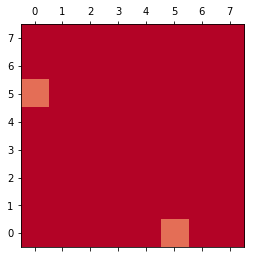

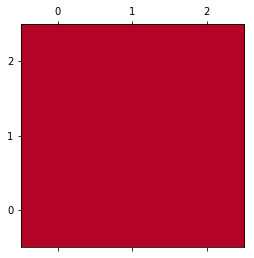

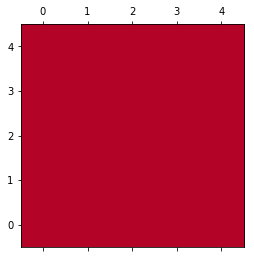

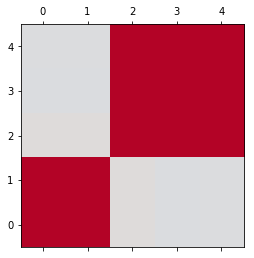

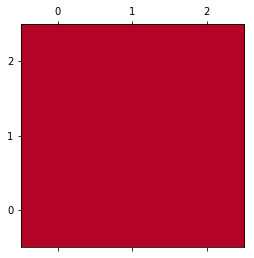

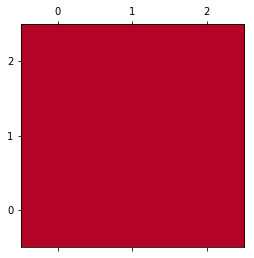

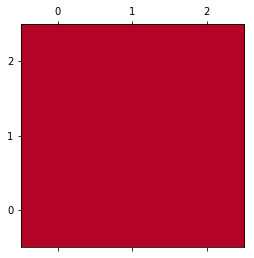

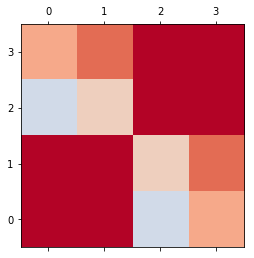

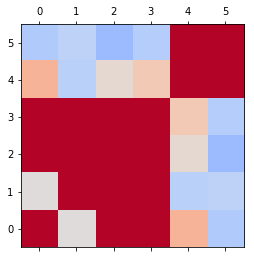

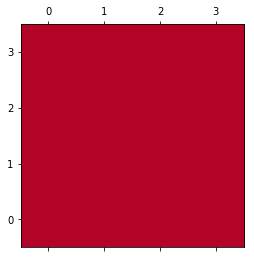

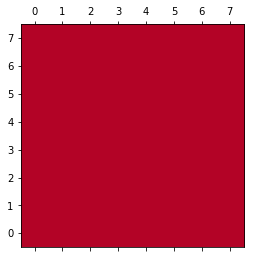

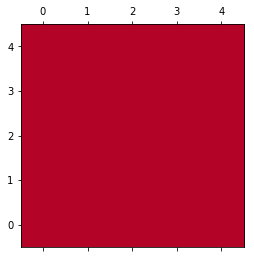

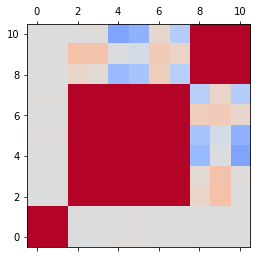

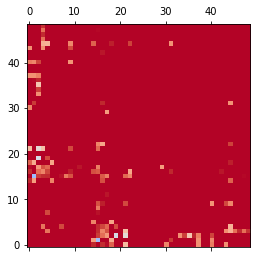

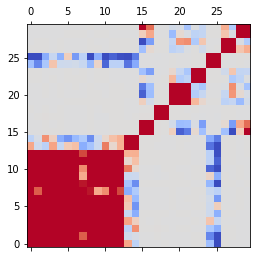

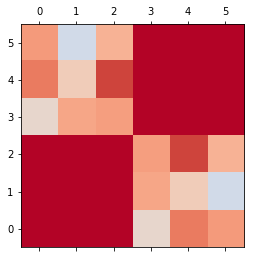

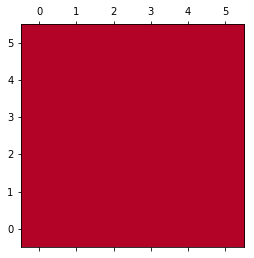

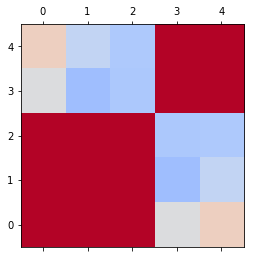

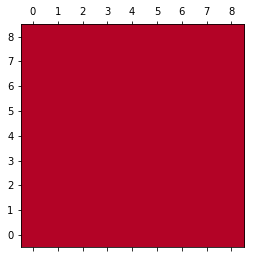

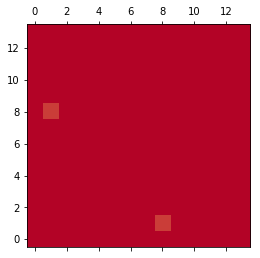

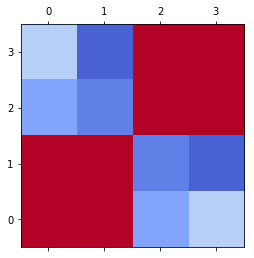

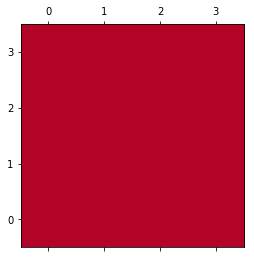

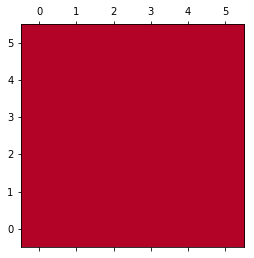

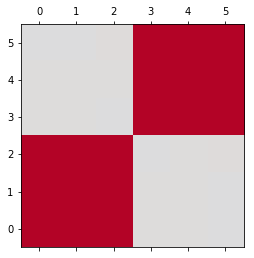

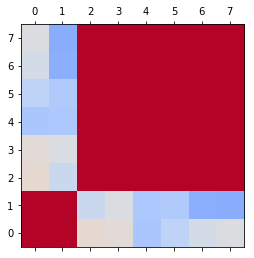

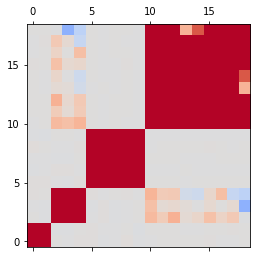

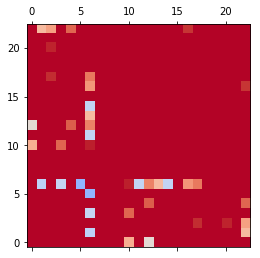

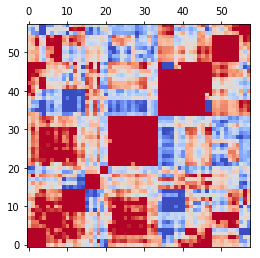

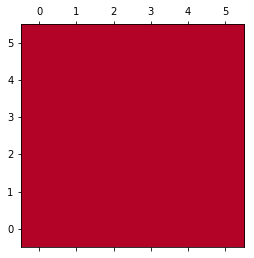

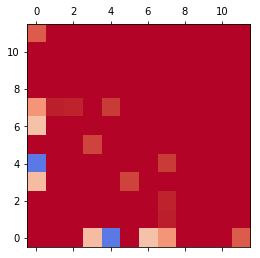

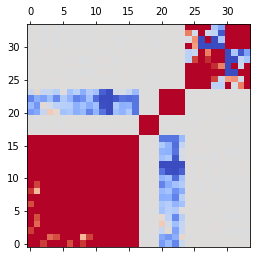

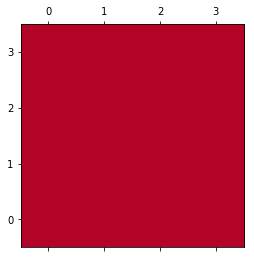

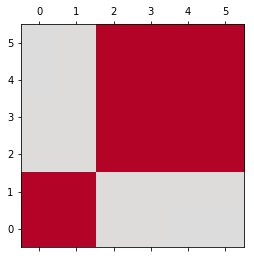

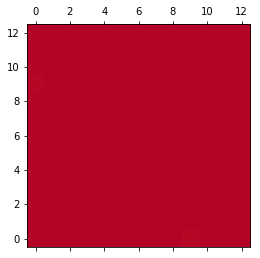

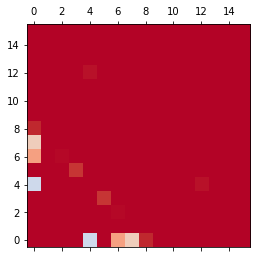

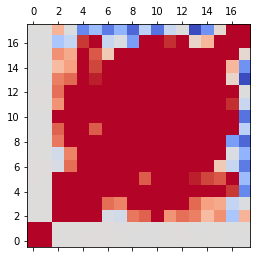

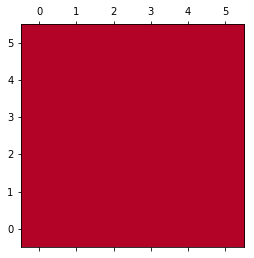

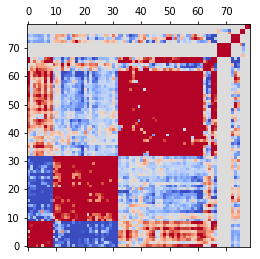

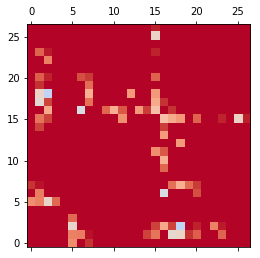

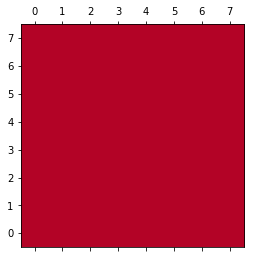

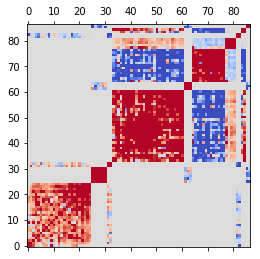

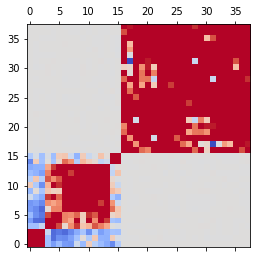

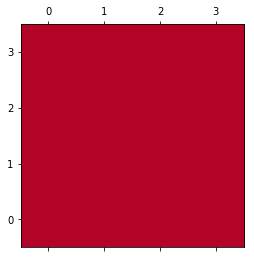

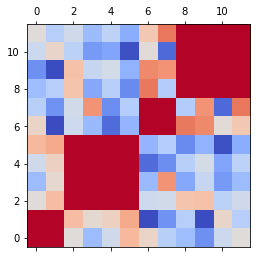

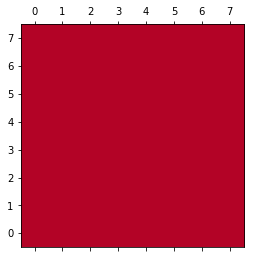

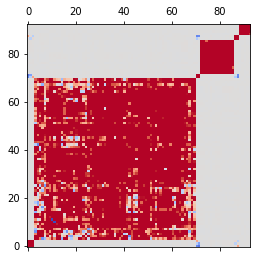

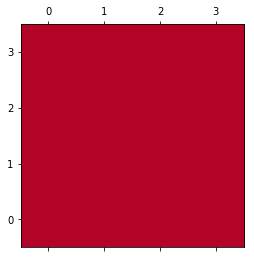

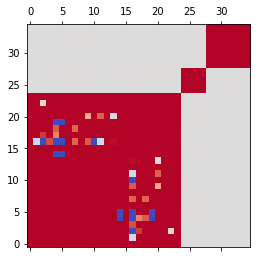

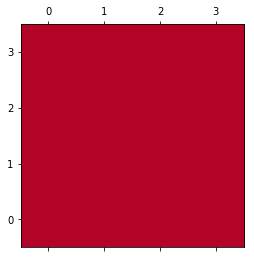

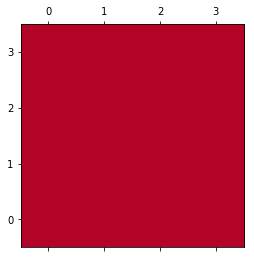

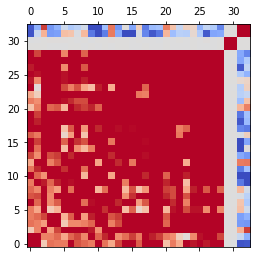

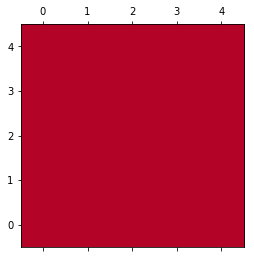

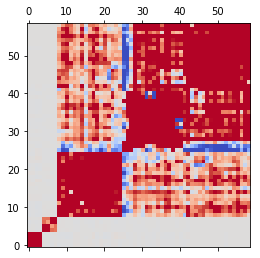

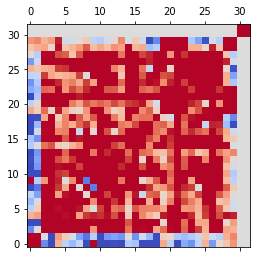

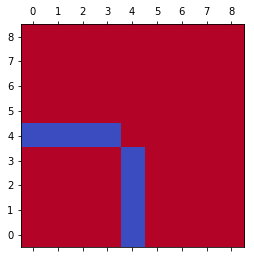

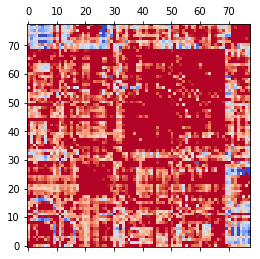

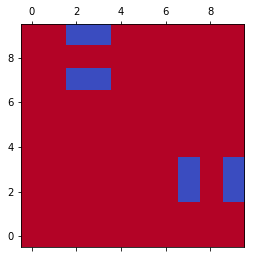

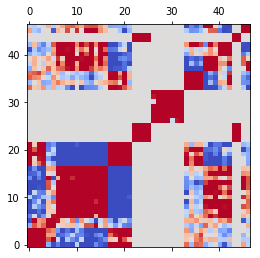

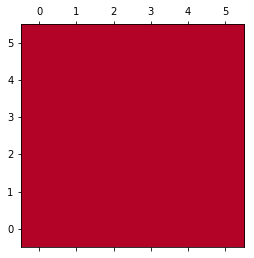

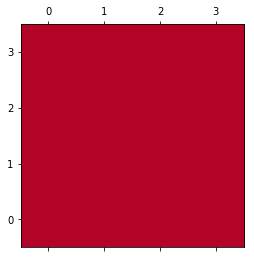

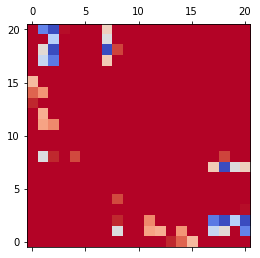

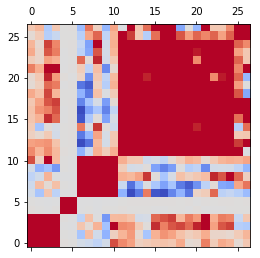

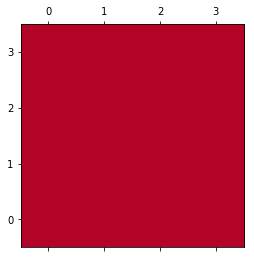

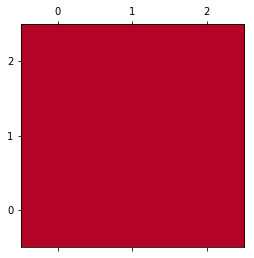

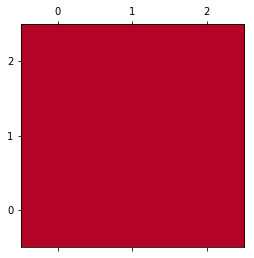

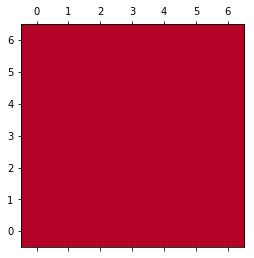

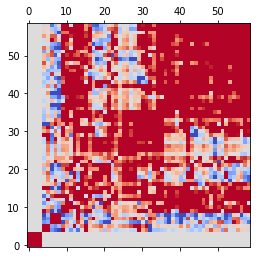

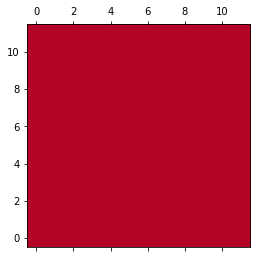

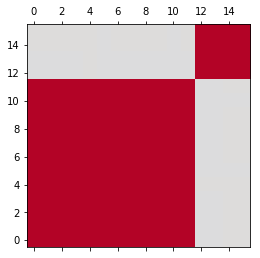

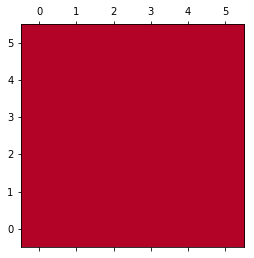

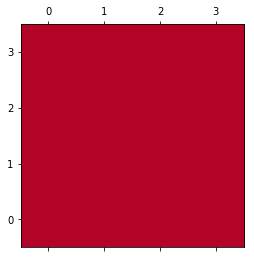

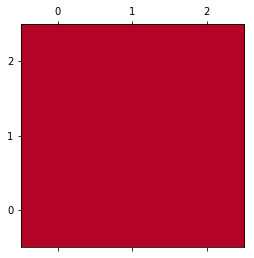

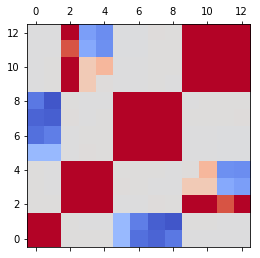

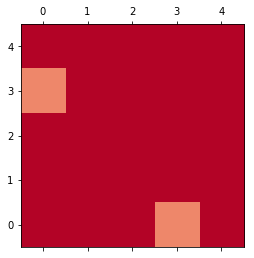

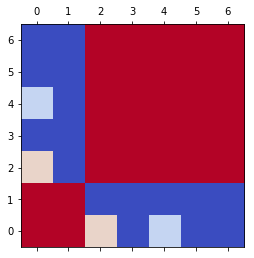

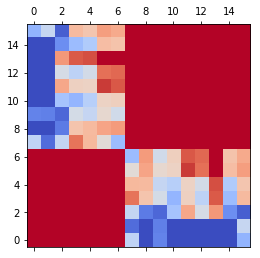

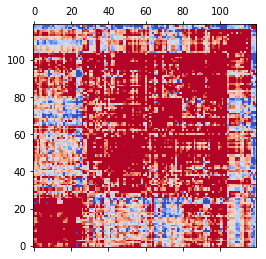

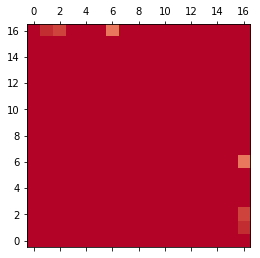

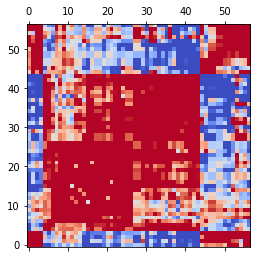

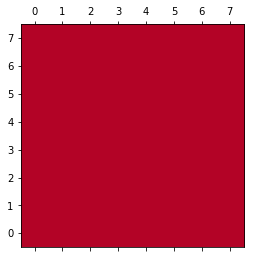

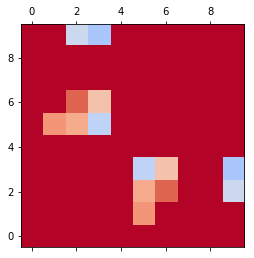

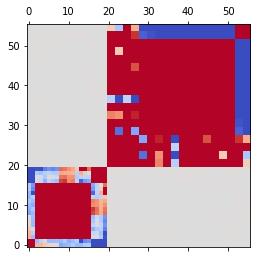

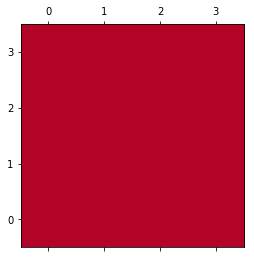

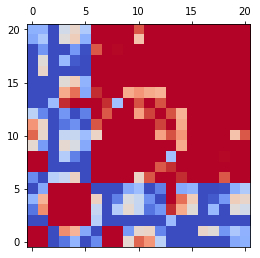

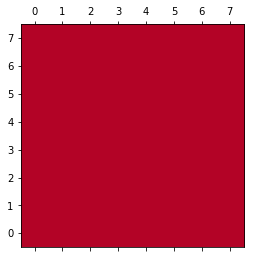

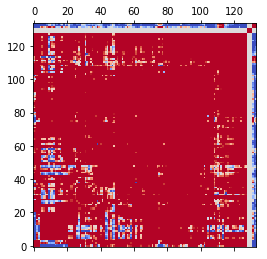

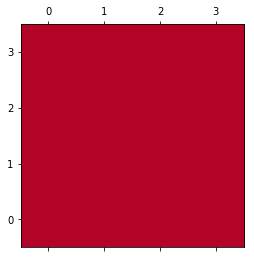

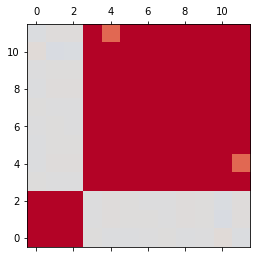

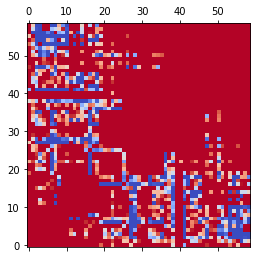

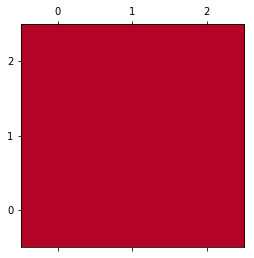

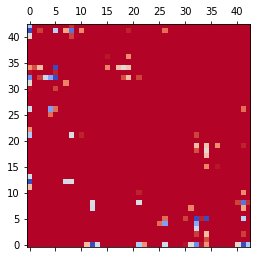

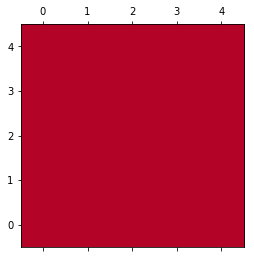

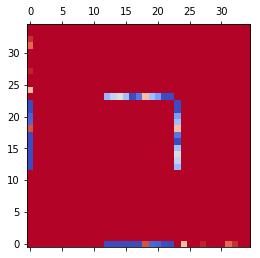

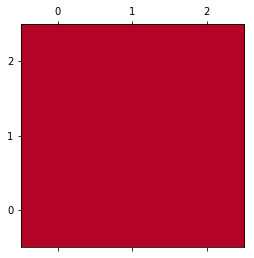

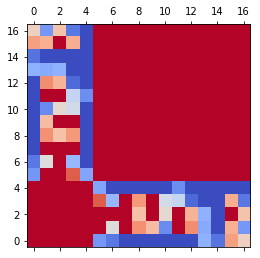

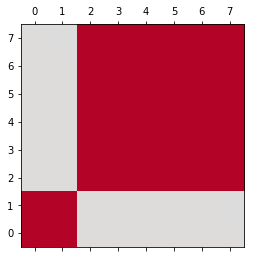

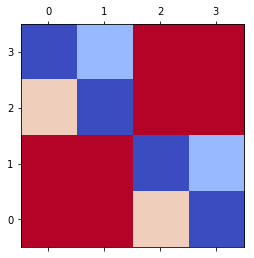

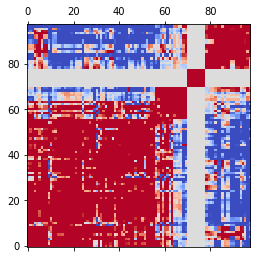

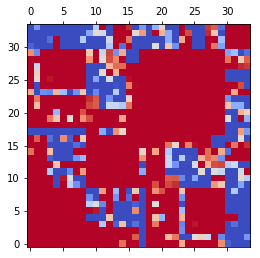

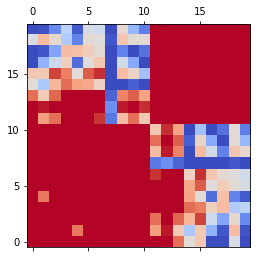

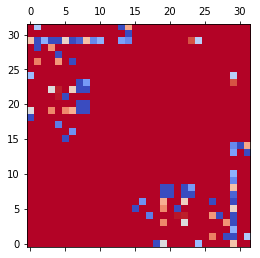

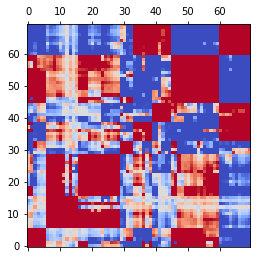

In [3]:
import operator
import matplotlib.pyplot as plt

top_clts = map(operator.itemgetter(1), clt_q)
highlight_idx = np.concatenate(top_clts)
mask_idx = np.array([x for x in range(D.shape[0]) if x not in highlight_idx])
mat = np.copy(D)
np.fill_diagonal(D, 1), np.fill_diagonal(mat, 1)
# mat[mask_idx[:,None], mask_idx] = 0
matshow_params = dict([(k.lstrip('matshow_'), v) for k, v in cache_npz.iteritems() if k.startswith('matshow_')])

# Find the separated clusters
ordered_D = D[R['leaves'],:][:,R['leaves']]
clt_idx = [0]
for i in xrange(1, simmt.shape[0]+1):
    prev_i = i - 1
    if (i == simmt.shape[0] or (ordered_D[i,prev_i] == 0 and ordered_D[prev_i,i] == 0)):
        if (i - clt_idx[-1] < 3):
            clt_idx[-1] = i
            continue
        plt.matshow(ordered_D[clt_idx[-1]:i,clt_idx[-1]:i], aspect='auto', origin='lower', cmap=plt.cm.coolwarm, **matshow_params)
        clt_idx.append(i)

# ax = plt.axes()
# ax.matshow(D[R['leaves'],:][:,R['leaves']], aspect='auto', origin='lower', cmap=plt.cm.coolwarm, **matshow_params)
# plt.matshow(D[R['leaves'],:][:,R['leaves']], aspect='auto', origin='lower', cmap=plt.cm.coolwarm, **matshow_params)
# xtick_label, ytick_label = ax.set_xticks([]), ax.set_yticks([])
# plt.savefig('hrc_orig.%s'%FMT, format=FMT)

# ax = plt.axes()
# ax.matshow(mat[R['leaves'],:][:,R['leaves']], aspect='auto', origin='lower', cmap=plt.cm.coolwarm, **matshow_params)
# plt.matshow(mat[R['leaves'],:][:,R['leaves']], aspect='auto', origin='lower', cmap=plt.cm.coolwarm, **matshow_params)
# xtick_label, ytick_label = ax.set_xticks([]), ax.set_yticks([])
# plt.savefig('hrc_zoomin.%s'%FMT, format=FMT)

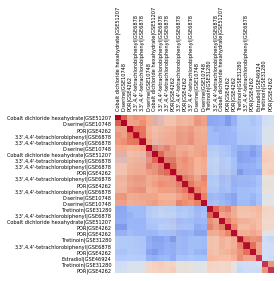

In [5]:
from bionlp.util import func

idx_map = dict([(x, i) for i, x in enumerate(R['leaves'])])
# for i, (clt_str, score) in enumerate(func.sorted_dict(clt_dict)[::-1]):
#     if i not in [0,1,2,3,5,7,9,31,35,39]: continue
#     clt = np.array(map(int, clt_str.split(',')))
#
# clts = [map(int, R['leaves'][clt_idx[i]:clt_idx[i+1]]) for i in range(len(clt_idx)-1)]
# clts = [[4834,4843,4836,4840,4828,4832,6329,6336,6328,6330,4330],[1207,7703,1211,7691,1208,7702,1212,7690,6089,5554,5584,5389,5509,5551,5557],[2808,2809,2813,2815,2822,2826,2816,2817,5777,1147,1165,1171,8037,8038,8047,8048,1206,1205,1209,1210,7705,7704,7692,7693,2824,2825,2814,2818],[441,436,446,5039,5044,5049,1458,1466,1408,1416,1468,1476,276,234,7920,1469,1473,1409,1413,1459,1463,1457,1460,1461,1462,1464,1465,1410,1411,1414,1470,1471,1474],[7698,1216,7694,1215,7695,1219,7699,4226,4219,4220]]
clts = [[3076,3077,3064,3065,3068,3069,1319,3092,3099,3089,3096,3094,3101,3750,3747,3749,730,1178,1180,1177,1179,3103,3108],[2814,2816,2817,2818,2822,2826,2828,2835,706,993,987],[3534,4422,3495,3502,4426,3510,3503,3543,4434,3516,3540,3512,3536,4429,3515,3539,4428,3517,3541
,4431,3537,3538,3513,3514,3504,4433]]
for i, clt in enumerate(clts):
#     if i not in [2,3,4,7,8,9,10,11,13,14,19,21,22,34]: continue
    clt = np.array(clt)
##
# for i, (score, clt) in enumerate(clt_q):
    ordered_clt = np.array(map(operator.itemgetter(1), func.sorted_tuples([(idx_map[x], x) for x in clt], key_idx=0)))
#     ordered_clt = clt
#     print ordered_clt
    labels = ['|'.join(map(str, x)) for x in zip(sgn_df['subject'].loc[simmt.index[ordered_clt]], sgn_df['geo_id'].loc[simmt.index[ordered_clt]])]
#     clt, labels = zip(*func.sorted_tuples(zip(clt, labels), key_idx=1))
#     print zip(*func.sorted_tuples(zip(clt, labels), key_idx=1))
    if (len(set(labels)) == 1): continue
#     labels = ['|'.join(x)for x in zip(labels, map(str, ordered_clt))]
#     print ','.join(map(str, ordered_clt)) + '\n'
    ax = plt.axes()
    ax.matshow(mat[ordered_clt[:,None], ordered_clt], aspect='equal', origin='upper', cmap=plt.cm.coolwarm, alpha=0.8, vmin=-1, vmax=1)
#     plt.matshow(mat[ordered_clt[:,None], ordered_clt], aspect='auto', origin='upper', cmap=plt.cm.coolwarm, alpha=0.9)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xticks(range(ordered_clt.shape[0])), ax.set_yticks(range(ordered_clt.shape[0]))
#     lb_fontsize = 5.0*40/len(labels)
    lb_fontsize = 5
    ax.set_xticklabels(labels, fontdict={'fontsize':lb_fontsize}, rotation=90), ax.set_yticklabels(labels, fontdict={'fontsize':lb_fontsize}, rotation=0)
#     ax.set_xticks([]), ax.set_yticks([])
    ax.set_frame_on(False)
    try:
        plt.tight_layout()
    except Exception as e:
        print e
    plt.savefig('hrc_zoomin_%i.%s'%(i,FMT), format=FMT)

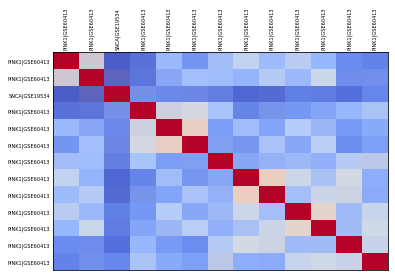

In [7]:
from bionlp.util import func

clt_strs = '4330,4828,4832,4834,4836,4840,4843,6220,6222,6228,6232,6233,6234,6240,6244,6245,6246,6248,6252,6256,6257,6258,6260,6264,6268,6269,6270,6276,6292,6293,6294,6300,6304,6306,6312,6316,6318,6324,6328,6329,6330,6336;6381,6384,6386,6387,6388,6389,6391,6392,6393,6395,6398,6400,6401,6402,6403,6405,6406,6407,6409,6412,6414,6415,6416,6417,6419,6420,6421,6456,6462,6484,6490,6491,6526,6532,6540,6546;5366,5369,5381,5384,5396,5399,5411,5414,5426,5429,5441,5444,5456,5459,5501,5504,5531,5534,5546,5549,5561,5564,5576,5579;1207,1208,1211,1212,5368,5371,5374,5377,5383,5386,5389,5392,5443,5446,5449,5452,5458,5461,5464,5467,5503,5506,5509,5512,5548,5551,5554,5557,5563,5566,5569,5572,5578,5581,5584,5587,6089,7690,7691,7702,7703;6425,6426,6427,6428,6432,6434,6435,6438,6439,6440,6441,6442,6444,6445,6446,6447,6448,6449,6450,6466,6467,6468,6469,6470,6472,6473,6474,6475,6476,6477,6478,6495,6496,6497,6500,6501,6502,6503,6504,6505;1143,1147,1165,1171,1205,1206,1209,1210,1563,2808,2809,2813,2814,2815,2816,2817,2818,2819,2822,2824,2825,2826,4011,4015,4097,4233,4319,4327,4448,4481,5026,5061,5159,5334,5336,5339,5341,5342,5349,5351,5352,5354,5355,5356,5357,5390,5510,5585,5777,5824,5881,5924,5961,6091,6353,6358,6359,6373,6381,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6395,6398,6400,6401,6402,6403,6404,6405,6406,6407,6408,6409,6412,6414,6415,6416,6417,6418,6419,6420,6421,6422,6423,6437,6451,6456,6457,6462,6465,6479,6482,6483,6484,6485,6488,6489,6490,6491,6492,6507,6521,6524,6526,6527,6528,6529,6530,6531,6532,6533,6535,6538,6540,6541,6542,6543,6544,6545,6546,6547,6740,6875,6876,6980,6981,7180,7181,7388,7692,7693,7704,7705,7833,7835,7836,7838,7839,7841,7867,7868,8037,8038,8042,8043,8047,8048,8055,8056,8067,8068;5472,5473,5475,5476,5477,5478,5479,5480,5482,5483,5484,5485,5487,5488,5490,5491,5492,5493,5494,5495,5497,5498,5499,5500,5517,5518,5520,5521,5522,5523,5524,5525,5527,5528,5529,5530;5366,5369,5376,5381,5384,5391,5396,5399,5406,5411,5414,5421,5426,5429,5436,5441,5444,5451,5456,5459,5466,5501,5504,5511,5531,5534,5541,5546,5549,5556,5561,5564,5571,5576,5579,5586;234,235,239,259,260,261,262,263,264,265,274,276,277,426,428,431,433,434,436,438,441,443,446,448,609,611,1383,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1422,1425,1427,1429,1432,1433,1435,1443,1447,1449,1452,1453,1455,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,3859,3860,3865,3866,3871,3872,3883,3884,3888,3894,3896,3906,3907,3908,3918,3920,4900,5032,5034,5037,5039,5042,5044,5047,5049,5052,5053,5054,5283,5284,5285,5286,5288,5289,5290,5291,5292,5293,5294,5361,5911,5912,5913,5914,6210,7503,7669,7885,7887,7897,7905,7906,7907,7908,7909,7910,7911,7920,7922,7925;476,1148,1154,1160,1166,1172,1215,1216,1219,1220,1495,1780,2804,2811,2820,2827,2828,2829,2830,2831,2834,2835,4016,4017,4018,4025,4203,4219,4220,4225,4226,4227,4304,4322,4326,4330,4383,4437,4480,4521,4597,4638,4828,4829,4830,4832,4834,4835,4836,4837,4840,4841,4842,4843,4934,5023,5062,5148,5333,5335,5337,5338,5340,5343,5344,5345,5347,5348,5785,5823,5829,5831,5832,5834,5923,6177,6184,6220,6221,6222,6228,6232,6233,6234,6240,6244,6245,6246,6248,6252,6256,6257,6258,6260,6264,6268,6269,6270,6276,6288,6292,6293,6294,6300,6304,6306,6312,6316,6318,6324,6328,6329,6330,6332,6336,6354,6355,6360,6361,6362,6365,6366,6368,6369,6370,6371,6372,6374,6375,6376,6377,6378,6379,6380,6394,6396,6397,6410,6424,6425,6426,6427,6428,6429,6430,6431,6432,6433,6434,6435,6436,6438,6439,6440,6441,6442,6443,6444,6445,6446,6447,6448,6449,6450,6452,6453,6455,6458,6459,6463,6464,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6481,6493,6494,6495,6496,6497,6499,6500,6501,6502,6503,6504,6505,6506,6508,6509,6512,6514,6515,6517,6519,6520,6523,6525,6537,6720,6873,6874,6877,7178,7179,7244,7391,7437,7461,7463,7467,7469,7694,7695,7698,7699,8036,8039,8040,8041,8044,8046,8049,8053,8057,8058,8061,8062,8065,8195,8196,8198,8199,8200,8201,8203,8204,8254;5472,5473,5475,5476,5477,5478,5479,5480,5482,5483,5484,5485,5487,5488,5490,5491,5492,5493,5494,5495,5497,5498,5499,5500,5517,5518,5520,5521,5522,5523,5524,5525,5527,5528,5529,5530;5366,5369,5376,5381,5384,5391,5396,5399,5406,5411,5414,5421,5426,5429,5436,5441,5444,5451,5456,5459,5466,5501,5504,5511,5531,5534,5541,5546,5549,5556,5561,5564,5571,5576,5579,5586;5366,5369,5381,5384,5396,5399,5411,5414,5426,5429,5441,5444,5456,5459,5501,5504,5531,5534,5546,5549,5561,5564,5576,5579;6425,6426,6427,6428,6432,6434,6435,6438,6439,6440,6441,6442,6444,6445,6446,6447,6448,6449,6450,6466,6467,6468,6469,6470,6472,6473,6474,6475,6476,6477,6478,6495,6496,6497,6500,6501,6502,6503,6504,6505;5376,5391,5406,5421,5436,5451,5466,5511,5541,5556,5571,5586;6381,6384,6386,6387,6388,6389,6391,6392,6393,6395,6398,6400,6401,6402,6403,6405,6406,6407,6409,6412,6414,6415,6416,6417,6419,6420,6421,6456,6462,6484,6490,6491,6526,6532,6540,6546;1207,1208,1211,1212,5368,5371,5374,5377,5383,5386,5389,5392,5443,5446,5449,5452,5458,5461,5464,5467,5503,5506,5509,5512,5548,5551,5554,5557,5563,5566,5569,5572,5578,5581,5584,5587,6089,7690,7691,7702,7703;476,1148,1154,1160,1166,1172,1215,1216,1219,1220,1495,1780,2804,2811,2820,2827,2828,2829,2830,2831,2834,2835,4016,4017,4018,4025,4203,4219,4220,4225,4226,4227,4304,4322,4326,4330,4383,4437,4480,4521,4597,4638,4828,4829,4830,4832,4834,4835,4836,4837,4840,4841,4842,4843,4934,5023,5062,5148,5333,5335,5337,5338,5340,5343,5344,5345,5347,5348,5785,5823,5829,5831,5832,5834,5923,6177,6184,6220,6221,6222,6228,6232,6233,6234,6240,6244,6245,6246,6248,6252,6256,6257,6258,6260,6264,6268,6269,6270,6276,6288,6292,6293,6294,6300,6304,6306,6312,6316,6318,6324,6328,6329,6330,6332,6336,6354,6355,6360,6361,6362,6365,6366,6368,6369,6370,6371,6372,6374,6375,6376,6377,6378,6379,6380,6394,6396,6397,6410,6424,6425,6426,6427,6428,6429,6430,6431,6432,6433,6434,6435,6436,6438,6439,6440,6441,6442,6443,6444,6445,6446,6447,6448,6449,6450,6452,6453,6455,6458,6459,6463,6464,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6481,6493,6494,6495,6496,6497,6499,6500,6501,6502,6503,6504,6505,6506,6508,6509,6512,6514,6515,6517,6519,6520,6523,6525,6537,6720,6873,6874,6877,7178,7179,7244,7391,7437,7461,7463,7467,7469,7694,7695,7698,7699,8036,8039,8040,8041,8044,8046,8049,8053,8057,8058,8061,8062,8065,8195,8196,8198,8199,8200,8201,8203,8204,8254;6353,6359,6423,6451,6457,6479,6485,6507,6521,6527,6528,6535,6541,6542,6543,6545;5383,5386,5392,5503,5506,5512,5548,5551,5557,5578,5581,5587,6089'
picked_clts = [map(int, clt.split(',')) for clt in clt_strs.split(';')]
idx_map = dict([(x, i) for i, x in enumerate(R['leaves'])])
lb_fontsize = 5
for i, clt in enumerate(picked_clts):
    clt = np.array(clt)
    ordered_clt = np.array(map(operator.itemgetter(1), func.sorted_tuples([(idx_map[x], x) for x in clt], key_idx=0)))
    labels = ['|'.join(x) for x in zip(sgn_df['subject'].loc[simmt.index[ordered_clt]], sgn_df['geo_id'].loc[simmt.index[ordered_clt]])]
    ax = plt.axes()
    ax.matshow(mat[ordered_clt[:,None], ordered_clt], aspect='auto', origin='upper', cmap=plt.cm.coolwarm, alpha=0.8)
#     plt.matshow(mat[ordered_clt[:,None], ordered_clt], aspect='auto', origin='upper', cmap=plt.cm.coolwarm, alpha=0.9)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xticks(range(clt.shape[0])), ax.set_yticks(range(clt.shape[0]))
    ax.set_xticklabels(labels, fontdict={'fontsize':lb_fontsize}, rotation=90), ax.set_yticklabels(labels, fontdict={'fontsize':lb_fontsize}, rotation=0)
#     ax.set_xticks([]), ax.set_yticks([])
    plt.savefig('hrc_zoomin_%i.%s'%(i,FMT), format=FMT)

In [8]:
s = np.copy(simmt)
np.fill_diagonal(s, 0)

In [9]:
uniq_pair, table_dict = {}, {}
for x, y in zip(*np.where((s > 0.6) | (s < -0.6))):
    idx = ','.join(map(str, sorted([x,y])))
    if uniq_pair.has_key(idx): continue
    uniq_pair[idx] = simmt.iloc[x,y]
    gse_pair = sgn_df['geo_id'].loc[simmt.index[[x,y]]].tolist()
    if (gse_pair[0] == gse_pair[1]): continue
    subj_pair, subjtype_pair = sgn_df['subject'].loc[simmt.index[[x,y]]].tolist(), sgn_df['subject_type'].loc[simmt.index[[x,y]]].tolist()
    organism_pair, celltype_pair = sgn_df['organisms'].loc[simmt.index[[x,y]]].tolist(), sgn_df['cell_type'].loc[simmt.index[[x,y]]].tolist()
    print subj_pair, subjtype_pair, gse_pair, '[%i,%i,%.3f]'%(x,y,simmt.iloc[x,y])
    table = table_dict.setdefault('-'.join(subjtype_pair), {})
    if (subjtype_pair[0] == subjtype_pair[1]):
        idx_pair = subjtype_pair[0]+'1', subjtype_pair[1]+'2'
    else:
        idx_pair = subjtype_pair
    table.setdefault(idx_pair[0], []).append(subj_pair[0]), table.setdefault(idx_pair[1], []).append(subj_pair[1])
    table.setdefault(' '.join([idx_pair[0], 'GEO']), []).append(gse_pair[0]), table.setdefault(' '.join([idx_pair[1], 'GEO']), []).append(gse_pair[1])
    table.setdefault(' '.join([idx_pair[0], 'Organism']), []).append(organism_pair[0]), table.setdefault(' '.join([idx_pair[1], 'Organism']), []).append(organism_pair[1])
    table.setdefault(' '.join([idx_pair[0], 'Cell Type']), []).append(celltype_pair[0]), table.setdefault(' '.join([idx_pair[1], 'Cell Type']), []).append(celltype_pair[1])
    table.setdefault('Score', []).append(simmt.iloc[x,y])
for tbl_name, table in table_dict.iteritems():
    df = pd.DataFrame.from_dict(table)
    df.sort_values('Score', ascending=False, inplace=True)
    df.to_csv(tbl_name + '.csv', index=False)

/home/shankai/.conda/envs/skyan/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/shankai/.conda/envs/skyan/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


['type 2 diabetes mellitus', 'IL10'] ['Disease', 'Gene'] ['GSE54917', 'GSE2172'] [7,3926,1.000]
['obesity', 'Human immunodeficiency virus infectious disease'] ['Disease', 'Disease'] ['GSE54917', 'GSE2171'] [8,9,0.789]
['hepatitis C', 'SOD1'] ['Disease', 'Gene'] ['GSE20948', 'GSE4390'] [46,7843,1.000]
['polycystic ovary syndrome', 'peripartum cardiomyopathy'] ['Disease', 'Disease'] ['GSE48301', 'GSE42955'] [79,107,0.644]
['polycystic ovary syndrome', 'Down syndrome'] ['Disease', 'Disease'] ['GSE48301', 'GSE42956'] [79,109,0.716]
['peripartum cardiomyopathy', 'Down syndrome'] ['Disease', 'Disease'] ['GSE42955', 'GSE42956'] [107,109,0.754]
['dilated cardiomyopathy', 'Down syndrome'] ['Disease', 'Disease'] ['GSE42955', 'GSE42956'] [108,109,0.643]
['breast cancer', 'RB1'] ['Disease', 'Gene'] ['GSE26910', 'GSE6787'] [125,4052,1.000]
['cystic fibrosis', 'Retinal damage'] ['Disease', 'Disease'] ['GSE3100', 'GSE1001'] [169,173,0.647]
['Retinal damage', 'CFTR'] ['Disease', 'Gene'] ['GSE1001', 'G

['Polymyositis', 'asthma'] ['Disease', 'Disease'] ['GSE3112', 'GSE16032'] [1158,1163,0.707]
['Dehydration', 'Simvastatin'] ['Disease', 'Drug'] ['GSE3110', 'GSE1871'] [1161,1903,1.000]
['Dehydration', 'asthma'] ['Disease', 'Disease'] ['GSE3110', 'GSE16032'] [1162,1163,0.619]
['chronic myeloid leukemia', 'EZH2'] ['Disease', 'Gene'] ['GSE48438', 'GSE39452'] [1183,7535,1.000]
["Huntington's disease", 'Imatinib'] ['Disease', 'Drug'] ['GSE9038', 'GSE1922'] [1188,3421,1.000]
["Huntington's disease", 'SOD1'] ['Disease', 'Gene'] ['GSE9038', 'GSE3343'] [1189,7629,1.000]
["Huntington's disease", 'SOD1'] ['Disease', 'Gene'] ['GSE9038', 'GSE3343'] [1190,7628,1.000]
["Huntington's disease", 'SOD1'] ['Disease', 'Gene'] ['GSE9038', 'GSE3343'] [1191,7627,1.000]
["Huntington's disease", 'SOD1'] ['Disease', 'Gene'] ['GSE9038', 'GSE3343'] [1192,7626,1.000]
["Huntington's disease", 'Bisphenol a'] ['Disease', 'Drug'] ['GSE9038', 'GSE17624'] [1200,2137,1.000]
["Huntington's disease", 'RP1'] ['Disease', 'Gene

['autism spectrum disorder', 'ALDH5A1'] ['Disease', 'Gene'] ['GSE63524', 'GSE2866'] [1348,4669,1.000]
['schizophrenia', 'ALDH5A1'] ['Disease', 'Gene'] ['GSE17612', 'GSE2866'] [1349,4658,1.000]
['schizophrenia', 'ALDH5A1'] ['Disease', 'Gene'] ['GSE17612', 'GSE2866'] [1350,4659,1.000]
['schizophrenia', 'ALDH5A1'] ['Disease', 'Gene'] ['GSE17612', 'GSE2866'] [1351,4660,0.761]
['schizophrenia', 'ALDH5A1'] ['Disease', 'Gene'] ['GSE17612', 'GSE2866'] [1351,4661,1.000]
['schizophrenia', 'ALDH5A1'] ['Disease', 'Gene'] ['GSE17612', 'GSE2866'] [1351,4673,0.784]
['schizophrenia', 'Haloperidol'] ['Disease', 'Drug'] ['GSE17612', 'GSE6467'] [1352,3197,1.000]
['nemaline myopathy', 'dengue hemorrhagic fever'] ['Disease', 'Disease'] ['GSE3384', 'GSE51808'] [1408,1458,0.608]
['nemaline myopathy', 'hepatocellular carcinoma'] ['Disease', 'Disease'] ['GSE3384', 'GSE60502'] [1409,1469,0.731]
['nemaline myopathy', "Huntington's disease"] ['Disease', 'Disease'] ['GSE3384', 'GSE26001'] [1409,1473,0.660]
['nemal